**Arham Yunus Awan | 2430-0007**

In [2]:
!pip install pandas numpy matplotlib seaborn scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


### **Phase 1: Analysis**

**STEP 1: LOAD AND UNDERSTAND THE DATA**

In [59]:
# Load the dataset
try:
    df_original = pd.read_csv('raw_data.csv')
    print(f"✓ Data loaded successfully!")
    print(f"  Dataset shape: {df_original.shape[0]} rows × {df_original.shape[1]} columns")
except FileNotFoundError:
    print("❌ Error: 'raw_data.csv' not found. Please ensure the file is in the same directory.")
    exit(1)

df = df_original.copy()

print("\n--- Basic Dataset Information ---")
df.info()

✓ Data loaded successfully!
  Dataset shape: 20780 rows × 56 columns

--- Basic Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative             

In [26]:
print("\n--- First 5 Rows ---")
df.head()


--- First 5 Rows ---


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [27]:
print("\n--- Last 5 Rows ---")
df.tail()


--- Last 5 Rows ---


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
20775,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,NaN
20776,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,NaN
20777,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,NaN
20778,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,0,0,0,0,0,NaN
20779,20200113,WA,NaN,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,12b994ad07c276a5278a2465e081751688739765,0,0,0,0,0,NaN


In [28]:
print("\n--- Summary Statistics (Before Cleaning) ---")
df.describe()


--- Summary Statistics (Before Cleaning) ---


,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,2.078000e+04,2.059200e+04,9271.000000,1.329000e+04,2138.000000,2.061400e+04,17339.000000,12382.000000,11636.000000,3789.000000,...,2.078000e+04,0.0,20780.000000,20780.000000,20780.0,20780.0,20780.0,20780.0,20780.0,0.0
mean,2.020244e+07,1.651560e+05,21729.123719,8.482261e+05,1659.862956,2.186936e+06,1190.576965,9262.762478,359.621176,1934.191607,...,7.061509e+05,NaN,24.790712,37.360780,0.0,0.0,0.0,0.0,0.0,NaN
std,3.608732e+03,3.267852e+05,45471.459778,1.344501e+06,4671.028548,4.436508e+06,2060.041207,12620.544081,594.831150,1953.329983,...,1.299996e+06,NaN,60.162742,208.237151,0.0,0.0,0.0,0.0,0.0,NaN
min,2.020011e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000e+00,NaN,-201.000000,-12257.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,2.020060e+07,5.753750e+03,773.500000,5.394125e+04,43.000000,1.040498e+05,166.500000,985.250000,60.000000,501.000000,...,2.565875e+04,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,2.020090e+07,4.606450e+04,4491.000000,3.059720e+05,212.500000,6.552670e+05,531.000000,4472.000000,172.000000,1295.000000,...,1.935810e+05,NaN,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,2.020120e+07,1.779580e+05,19553.000000,1.056611e+06,1295.750000,2.264766e+06,1279.000000,12248.500000,380.000000,2451.000000,...,7.737408e+05,NaN,24.000000,36.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,2.021031e+07,3.501394e+06,365961.000000,1.018694e+07,64400.000000,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,...,1.124825e+07,NaN,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


In [29]:
# Check unique values in categorical columns
print("\n--- Unique Values in Key Columns ---")
if 'state' in df.columns:
    print(f"Number of unique states: {df['state'].nunique()}")
    print(f"States: {sorted(df['state'].unique())}")


--- Unique Values in Key Columns ---
Number of unique states: 56
States: ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


**STEP 2: MISSING VALUES ANALYSIS**

In [30]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a comprehensive missing values report
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values,
    'Data_Type': df.dtypes.values
})

# Sort by missing count
missing_df = missing_df.sort_values('Missing_Count', ascending=False)

print("\n--- Missing Values Report ---")
missing_df


--- Missing Values Report ---


,Column,Missing_Count,Missing_Percentage,Data_Type
46,dataQualityGrade,20780,100.000000,float64
55,grade,20780,100.000000,float64
37,positiveTestsPeopleAntigen,20147,96.953802,float64
35,negativeTestsPeopleAntibody,19808,95.322425,float64
36,totalTestsPeopleAntigen,19781,95.192493,float64
34,positiveTestsPeopleAntibody,19686,94.735322,float64
13,onVentilatorCumulative,19490,93.792108,float64
32,negativeTestsAntibody,19322,92.983638,float64
5,pending,18642,89.711261,float64
33,totalTestsPeopleAntibody,18580,89.412897,float64



--- Creating Professional Missing Data Visualizations ---
✓ Matrix visualization saved: 'step2a_missing_matrix.png'


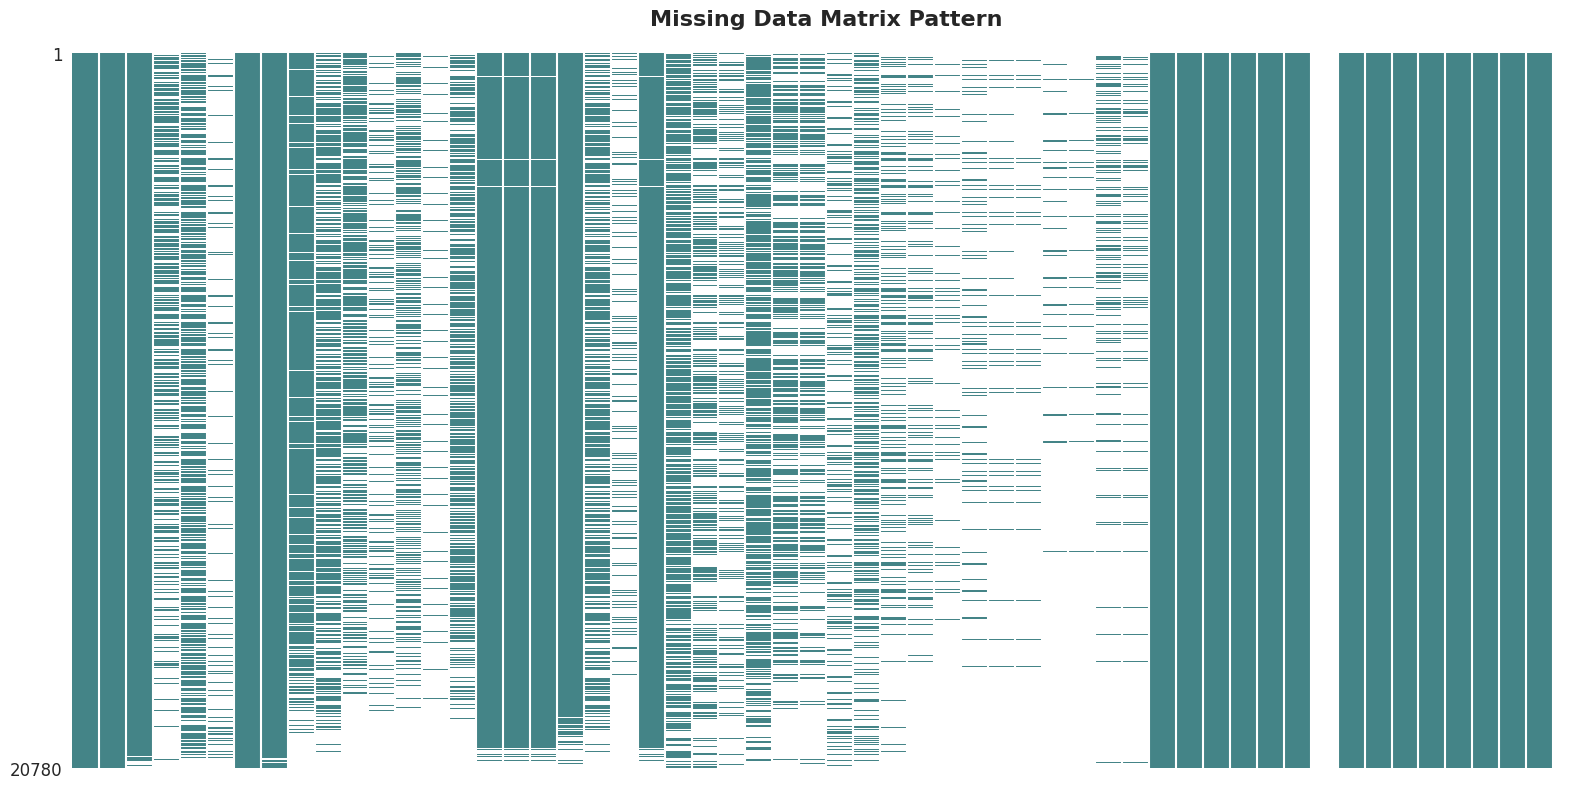

✓ Bar chart saved: 'step2b_missing_bar.png'


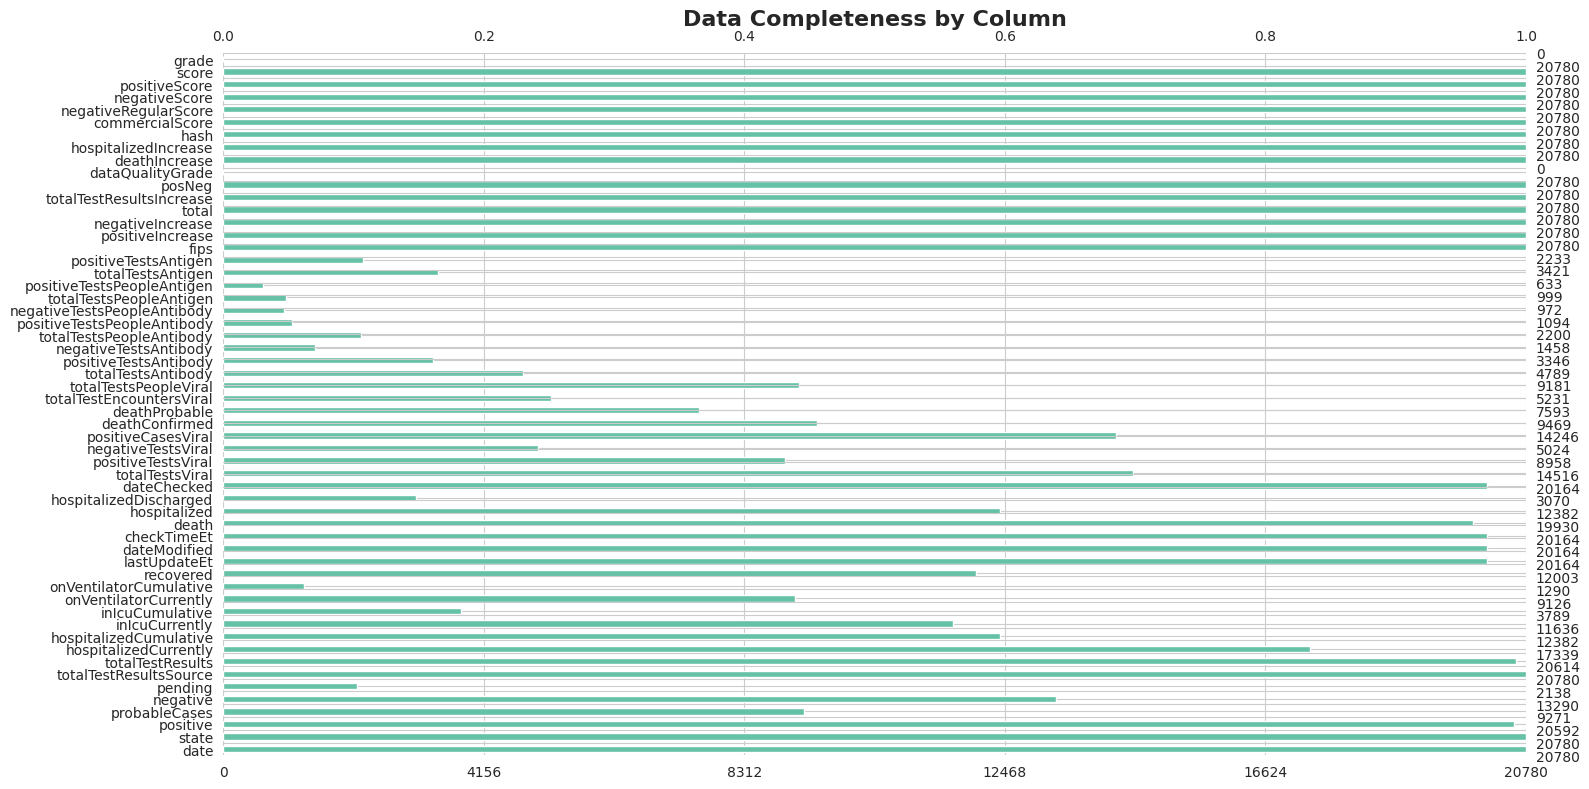

✓ Correlation heatmap saved: 'step2c_missing_heatmap.png'


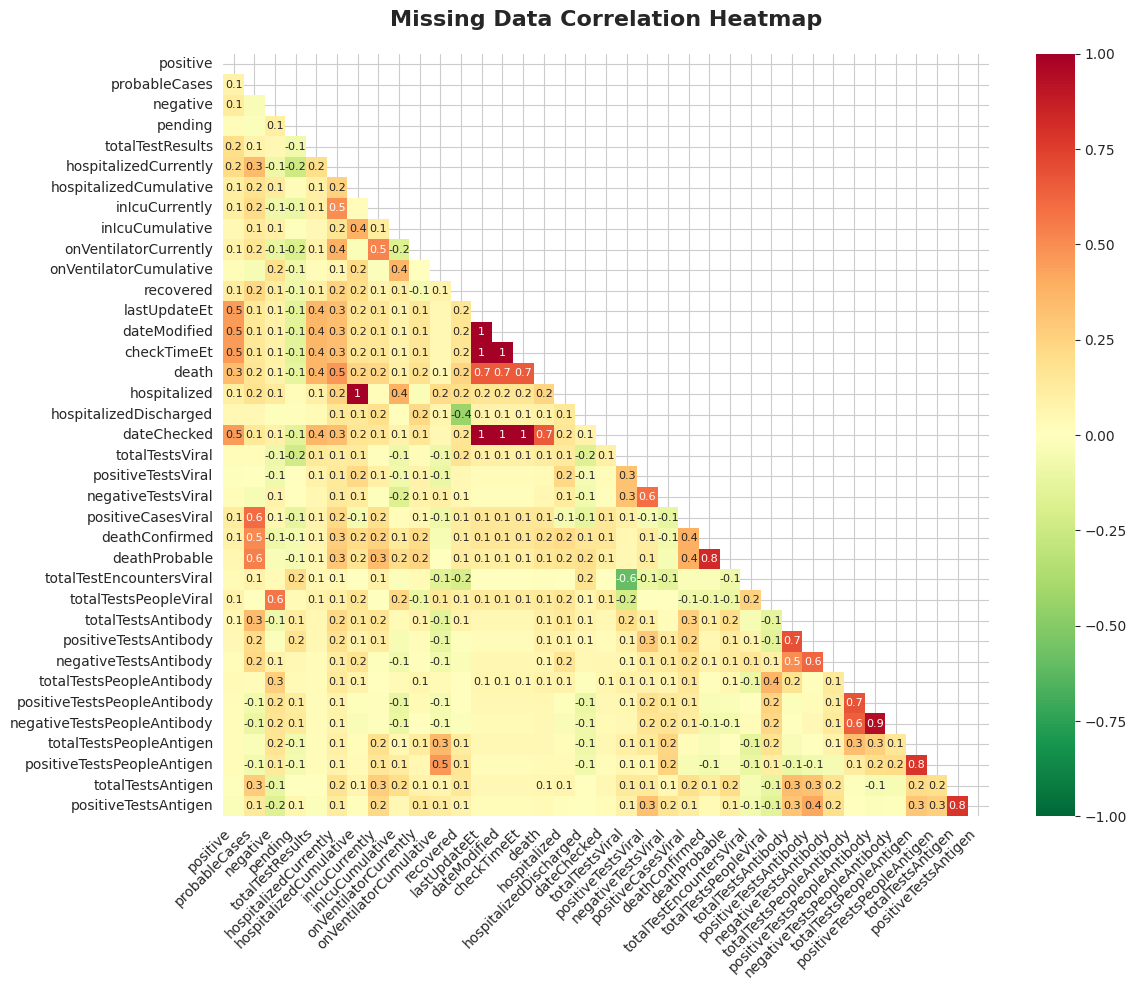


✓ All missing data visualizations created successfully!


In [31]:
# Visualize missing values using missingno library
import missingno as msno

print("\n--- Creating Professional Missing Data Visualizations ---")

# Matrix plot - shows pattern of missing data
fig, ax = plt.subplots(figsize=(16, 8))
msno.matrix(df, ax=ax, fontsize=10, sparkline=False, color=(0.27, 0.52, 0.53))
plt.title('Missing Data Matrix Pattern',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('step2a_missing_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Matrix visualization saved: 'step2a_missing_matrix.png'")
plt.show()

# Bar chart - shows completeness per column
fig, ax = plt.subplots(figsize=(16, 8))
msno.bar(df, ax=ax, fontsize=10, color=(0.4, 0.76, 0.65))
plt.title('Data Completeness by Column',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Completeness (%)', fontsize=12)
plt.tight_layout()
plt.savefig('step2b_missing_bar.png', dpi=300, bbox_inches='tight')
print("✓ Bar chart saved: 'step2b_missing_bar.png'")
plt.show()

# Heatmap - shows correlation between missingness
if df.isnull().sum().sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 10))
    msno.heatmap(df, ax=ax, fontsize=10, cmap='RdYlGn_r')
    plt.title('Missing Data Correlation Heatmap',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('step2c_missing_heatmap.png', dpi=300, bbox_inches='tight')
    print("✓ Correlation heatmap saved: 'step2c_missing_heatmap.png'")
    plt.show()

print("\n✓ All missing data visualizations created successfully!")

In [32]:
# KEY STATISTICS about missing values
print("\n--- Key Missing Values Statistics ---")
print(f"Total cells in dataset: {df.shape[0] * df.shape[1]:,}")
print(f"Total missing cells: {df.isnull().sum().sum():,}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")


--- Key Missing Values Statistics ---
Total cells in dataset: 1,163,680
Total missing cells: 465,549
Percentage of missing data: 40.01%


**STEP 3: HANDLE MISSING VALUES**

In [60]:
# ============================================
# DROP UNNECESSARY COLUMNS
# ============================================
print("\n" + "=" * 80)
print("DROPPING UNNECESSARY COLUMNS")
print("=" * 80)

# First, identify columns with zero variance (same value in all rows)
print("\n--- Identifying Columns with Zero Variance ---")
zero_variance_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Only check numerical columns
        if df[col].nunique() <= 1:  # Only 1 unique value (or all NaN)
            unique_val = df[col].dropna().unique()
            zero_variance_cols.append(col)
            print(f"  {col}: {unique_val if len(unique_val) > 0 else 'All NaN'}")

if zero_variance_cols:
    print(f"\n✓ Found {len(zero_variance_cols)} columns with zero variance")
else:
    print("\n✓ No zero variance columns found")

# Columns to drop based on missing value analysis
columns_to_drop = [
    # 100% missing - completely useless
    'dataQualityGrade',
    'grade',

    # >90% missing (antibody/antigen testing - not widely adopted)
    'positiveTestsPeopleAntigen',
    'negativeTestsPeopleAntibody',
    'totalTestsPeopleAntigen',
    'positiveTestsPeopleAntibody',
    'onVentilatorCumulative',
    'negativeTestsAntibody',
    'totalTestsPeopleAntibody',
    'positiveTestsAntigen',

    # 80-90% missing - unreliable
    'pending',
    'hospitalizedDischarged',
    'positiveTestsAntibody',
    'totalTestsAntigen',
    'totalTestsAntibody',
    'inIcuCumulative',

    # 70-80% missing - redundant or conflicting
    'negativeTestsViral',
    'totalTestEncountersViral',

    # Metadata columns - low analytical value
    'lastUpdateEt',
    'checkTimeEt',
    'dateModified',
    'dateChecked',
    'hash',
    'totalTestResultsSource',

    # Duplicate column (same as hospitalizedCumulative)
    'hospitalized'
]

# Add zero variance columns to drop list
columns_to_drop.extend(zero_variance_cols)

# Remove duplicates
columns_to_drop = list(set(columns_to_drop))

print(f"\n--- Columns to Drop Summary ---")
print(f"Total columns to drop: {len(columns_to_drop)}")
print("\nDropping the following columns:")
for i, col in enumerate(sorted(columns_to_drop), 1):
    if col in df.columns:
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
        nunique = df[col].nunique()
        reason = ""
        if col in zero_variance_cols:
            reason = "[Zero Variance]"
        elif missing_pct > 90:
            reason = "[>90% Missing]"
        elif missing_pct > 70:
            reason = "[>70% Missing]"
        elif col in ['hash', 'totalTestResultsSource', 'lastUpdateEt', 'checkTimeEt', 'dateModified', 'dateChecked']:
            reason = "[Metadata]"
        elif col == 'hospitalized':
            reason = "[Duplicate]"

        print(f"  {i:2d}. {col:<35s} ({missing_pct:>6.2f}% missing, {nunique} unique) {reason}")

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\n--- Before and After ---")
print(f"Original columns: {len(df.columns)}")
print(f"Dropped columns:  {len(columns_to_drop)}")
print(f"Remaining columns: {len(df_cleaned.columns)}")
print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape:  {df_cleaned.shape}")


# Update df to cleaned version
df = df_cleaned.copy()

print("\n✓ Unnecessary columns dropped successfully!")


DROPPING UNNECESSARY COLUMNS

--- Identifying Columns with Zero Variance ---
  dataQualityGrade: All NaN
  commercialScore: [0]
  negativeRegularScore: [0]
  negativeScore: [0]
  positiveScore: [0]
  score: [0]
  grade: All NaN

✓ Found 7 columns with zero variance

--- Columns to Drop Summary ---
Total columns to drop: 30

Dropping the following columns:
   1. checkTimeEt                         (  2.96% missing, 9491 unique) [Metadata]
   2. commercialScore                     (  0.00% missing, 1 unique) [Zero Variance]
   3. dataQualityGrade                    (100.00% missing, 0 unique) [Zero Variance]
   4. dateChecked                         (  2.96% missing, 9502 unique) [Metadata]
   5. dateModified                        (  2.96% missing, 9502 unique) [Metadata]
   6. grade                               (100.00% missing, 0 unique) [Zero Variance]
   7. hash                                (  0.00% missing, 20780 unique) [Metadata]
   8. hospitalized                        ( 40

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      20780 non-null  int64  
 1   state                     20780 non-null  object 
 2   positive                  20592 non-null  float64
 3   probableCases             9271 non-null   float64
 4   negative                  13290 non-null  float64
 5   totalTestResults          20614 non-null  float64
 6   hospitalizedCurrently     17339 non-null  float64
 7   hospitalizedCumulative    12382 non-null  float64
 8   inIcuCurrently            11636 non-null  float64
 9   onVentilatorCurrently     9126 non-null   float64
 10  recovered                 12003 non-null  float64
 11  death                     19930 non-null  float64
 12  totalTestsViral           14516 non-null  float64
 13  positiveTestsViral        8958 non-null   float64
 14  positi

In [61]:
# Convert date column first
# BASIC PRINCIPLE: Handle data types before numerical operations
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    print("✓ Date column converted to datetime format")

print("\n--- Missing Value Handling Strategy ---")
print("For numerical columns: Filling with 0 (common for COVID reporting)")
print("Rationale: Missing values in COVID data often mean 'not reported' or 'zero'")

# Check missing values before filling
print("\n--- Missing Values BEFORE Handling ---")
missing_before = df.isnull().sum()
missing_before_filtered = missing_before[missing_before > 0].sort_values(ascending=False)
for col, count in missing_before_filtered.items():
    pct = (count / len(df)) * 100
    print(f"  {col:<30s}: {count:>6} ({pct:>6.2f}%)")

# Identify numerical columns (excluding date)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns identified: {len(numerical_cols)}")

# Fill missing values in numerical columns with 0
df[numerical_cols] = df[numerical_cols].fillna(0)

# Verify no missing values remain in numerical columns
print("\n--- Verification After Handling ---")
remaining_missing = df[numerical_cols].isnull().sum().sum()
print(f"Remaining missing values in numerical columns: {remaining_missing}")

# Check if any missing values remain in any columns
total_missing_after = df.isnull().sum().sum()
print(f"Total missing values in entire dataset: {total_missing_after}")

if remaining_missing == 0:
    print("\n✓ All missing values in numerical columns handled successfully!")
else:
    print(f"\n⚠ Warning: {remaining_missing} missing values still remain in numerical columns")

# Show final missing value status
if total_missing_after > 0:
    print("\n--- Remaining Missing Values (Non-Numerical Columns) ---")
    missing_after = df.isnull().sum()
    missing_after_filtered = missing_after[missing_after > 0]
    for col, count in missing_after_filtered.items():
        pct = (count / len(df)) * 100
        print(f"  {col:<30s}: {count:>6} ({pct:>6.2f}%)")
else:
    print("\n✓ Dataset is now 100% complete - NO missing values!")


✓ Date column converted to datetime format

--- Missing Value Handling Strategy ---
For numerical columns: Filling with 0 (common for COVID reporting)
Rationale: Missing values in COVID data often mean 'not reported' or 'zero'

--- Missing Values BEFORE Handling ---
  deathProbable                 :  13187 ( 63.46%)
  positiveTestsViral            :  11822 ( 56.89%)
  onVentilatorCurrently         :  11654 ( 56.08%)
  totalTestsPeopleViral         :  11599 ( 55.82%)
  probableCases                 :  11509 ( 55.38%)
  deathConfirmed                :  11311 ( 54.43%)
  inIcuCurrently                :   9144 ( 44.00%)
  recovered                     :   8777 ( 42.24%)
  hospitalizedCumulative        :   8398 ( 40.41%)
  negative                      :   7490 ( 36.04%)
  positiveCasesViral            :   6534 ( 31.44%)
  totalTestsViral               :   6264 ( 30.14%)
  hospitalizedCurrently         :   3441 ( 16.56%)
  death                         :    850 (  4.09%)
  positive         

In [50]:
# Summary
print("\n--- Missing Values Summary ---")
print(f"Before: {missing_before.sum():,} missing values")
print(f"After:  {total_missing_after:,} missing values")
print(f"Filled: {missing_before.sum() - total_missing_after:,} missing values")


--- Missing Values Summary ---
Before: 122,334 missing values
After:  0 missing values
Filled: 122,334 missing values


**STEP 4: OUTLIER DETECTION**

In [52]:
# We'll use THREE methods for outlier detection:
# 1. IQR Method (Interquartile Range) - BASIC METHOD
# 2. Z-Score Method - STATISTICAL METHOD
# 3. Visualization Method - GRAPHICAL METHOD

# Select key columns for outlier analysis
outlier_columns = [
    'positive',
    'death',
    'totalTestResults',
    'hospitalizedCurrently',
    'hospitalizedCumulative',
    'positiveIncrease',
    'deathIncrease'
]

# Verify columns exist and have data
outlier_columns = [col for col in outlier_columns if col in df.columns and df[col].sum() > 0]

print(f"\nAnalyzing outliers in {len(outlier_columns)} columns: {outlier_columns}")

# Store outlier information
outlier_summary = {}

print("\n" + "-" * 80)
print("METHOD 1: IQR (Interquartile Range) Method")
print("-" * 80)
print("CONCEPT: Values below Q1-1.5*IQR or above Q3+1.5*IQR are considered outliers")
print("where Q1 is 25th percentile, Q3 is 75th percentile, IQR = Q3 - Q1")

for col in outlier_columns:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)  # 25th percentile (BASIC STATISTICS)
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        'IQR': {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
    }

    print(f"\n{col}:")
    print(f"  Q1 (25th percentile): {Q1:,.2f}")
    print(f"  Q3 (75th percentile): {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Lower Bound: {lower_bound:,.2f}")
    print(f"  Upper Bound: {upper_bound:,.2f}")
    print(f"  Outliers found: {len(outliers):,} ({(len(outliers)/len(df)*100):.2f}%)")


Analyzing outliers in 7 columns: ['positive', 'death', 'totalTestResults', 'hospitalizedCurrently', 'hospitalizedCumulative', 'positiveIncrease', 'deathIncrease']

--------------------------------------------------------------------------------
METHOD 1: IQR (Interquartile Range) Method
--------------------------------------------------------------------------------
CONCEPT: Values below Q1-1.5*IQR or above Q3+1.5*IQR are considered outliers
where Q1 is 25th percentile, Q3 is 75th percentile, IQR = Q3 - Q1

positive:
  Q1 (25th percentile): 5,266.00
  Q3 (75th percentile): 175,614.00
  IQR: 170,348.00
  Lower Bound: -250,256.00
  Upper Bound: 431,136.00
  Outliers found: 2,205 (10.61%)

death:
  Q1 (25th percentile): 118.00
  Q3 (75th percentile): 4,159.00
  IQR: 4,041.00
  Lower Bound: -5,943.50
  Upper Bound: 10,220.50
  Outliers found: 1,953 (9.40%)

totalTestResults:
  Q1 (25th percentile): 96,823.00
  Q3 (75th percentile): 2,243,481.25
  IQR: 2,146,658.25
  Lower Bound: -3,123,16

In [53]:
print("\n" + "-" * 80)
print("METHOD 2: Z-Score Method")
print("-" * 80)
print("CONCEPT: Z-score measures how many standard deviations away from mean")
print("Values with |Z-score| > 3 are typically considered outliers")

for col in outlier_columns:
    # Calculate Z-scores
    # Z = (X - mean) / standard_deviation (STATISTICAL FORMULA)
    mean = df[col].mean()
    std = df[col].std()

    if std > 0:  # Avoid division by zero
        z_scores = np.abs((df[col] - mean) / std)

        # Find outliers (|Z-score| > 3)
        outliers_zscore = df[z_scores > 3]

        outlier_summary[col]['ZScore'] = {
            'count': len(outliers_zscore),
            'percentage': (len(outliers_zscore) / len(df)) * 100,
            'mean': mean,
            'std': std
        }

        print(f"\n{col}:")
        print(f"  Mean: {mean:,.2f}")
        print(f"  Standard Deviation: {std:,.2f}")
        print(f"  Outliers (|Z| > 3): {len(outliers_zscore):,} ({(len(outliers_zscore)/len(df)*100):.2f}%)")
    else:
        print(f"\n{col}:")
        print(f"  Skipping - Standard deviation is zero (no variation)")


--------------------------------------------------------------------------------
METHOD 2: Z-Score Method
--------------------------------------------------------------------------------
CONCEPT: Z-score measures how many standard deviations away from mean
Values with |Z-score| > 3 are typically considered outliers

positive:
  Mean: 163,661.78
  Standard Deviation: 325,679.24
  Outliers (|Z| > 3): 380 (1.83%)

death:
  Mean: 3,531.60
  Standard Deviation: 6,194.64
  Outliers (|Z| > 3): 616 (2.96%)

totalTestResults:
  Mean: 2,169,465.87
  Standard Deviation: 4,423,037.98
  Outliers (|Z| > 3): 452 (2.18%)

hospitalizedCurrently:
  Mean: 993.43
  Standard Deviation: 1,933.10
  Outliers (|Z| > 3): 449 (2.16%)

hospitalizedCumulative:
  Mean: 5,519.32
  Standard Deviation: 10,750.20
  Outliers (|Z| > 3): 643 (3.09%)

positiveIncrease:
  Mean: 1,383.85
  Standard Deviation: 3,023.56
  Outliers (|Z| > 3): 331 (1.59%)

deathIncrease:
  Mean: 24.79
  Standard Deviation: 60.16
  Outliers (|Z|

**STEP 5: VISUALIZE OUTLIERS**


✓ Outlier visualizations saved: 'step5_outlier_visualizations.png'


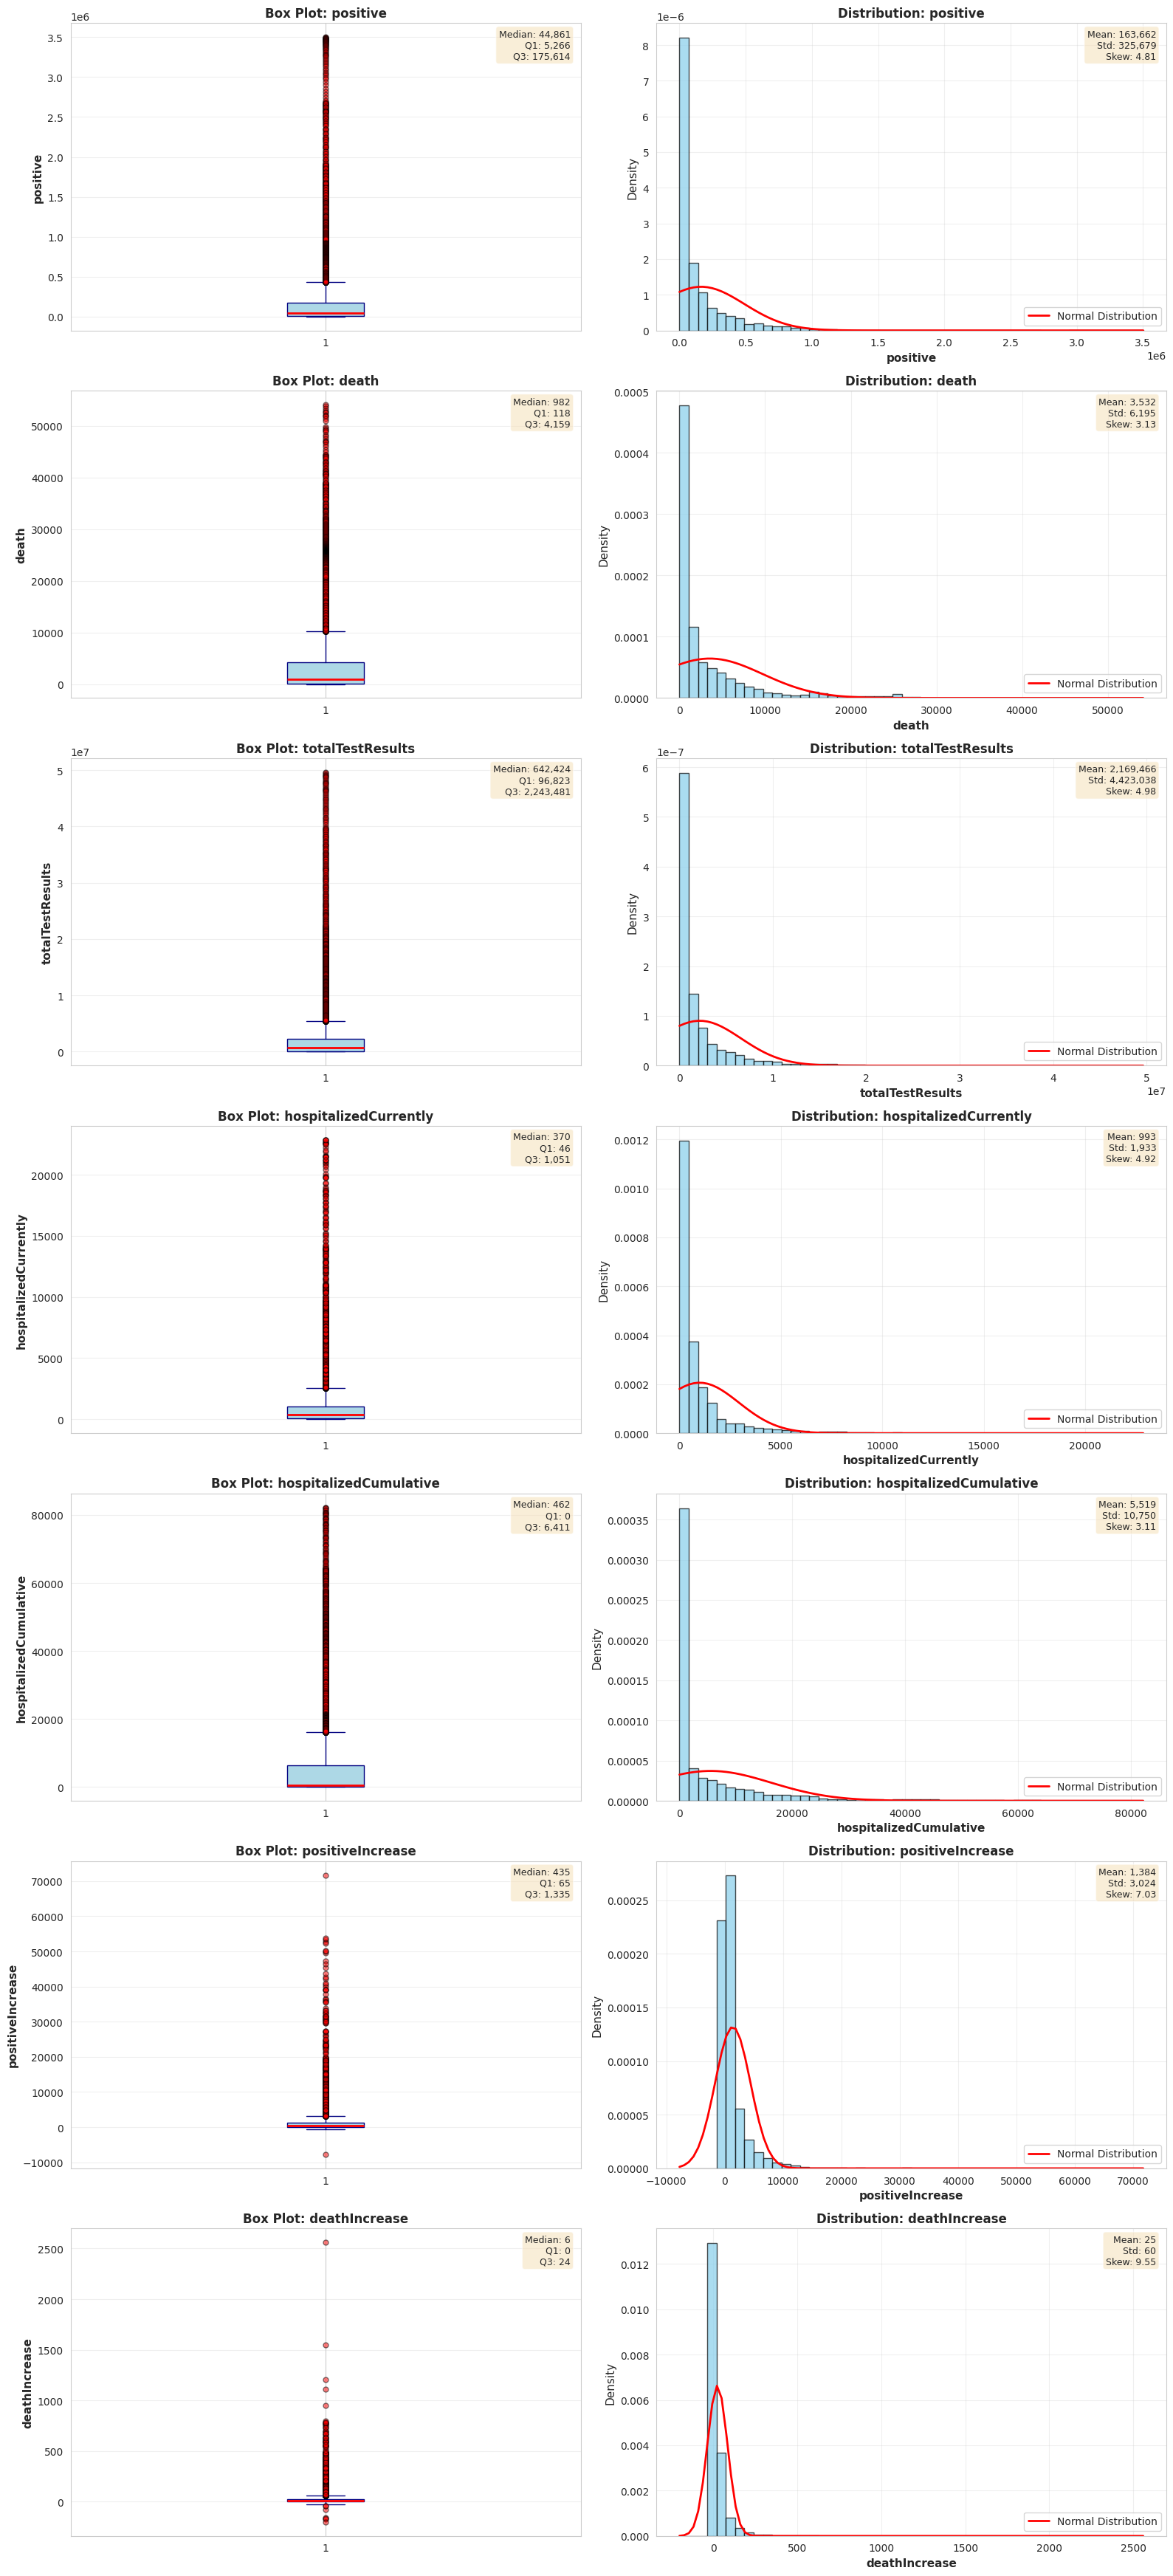

In [56]:
# Create comprehensive visualizations
n_cols = len(outlier_columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(16, 5*n_cols))

if n_cols == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(outlier_columns):
    # Box Plot (shows outliers clearly)
    # BASIC VISUALIZATION: Box plot shows median, quartiles, and outliers
    axes[idx, 0].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='navy'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='navy'),
                         capprops=dict(color='navy'),
                         flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    axes[idx, 0].set_ylabel(col, fontsize=11, fontweight='bold')
    axes[idx, 0].set_title(f'Box Plot: {col}',
                          fontsize=12, fontweight='bold')
    axes[idx, 0].grid(axis='y', alpha=0.3)

    # Add statistics text
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    median = df[col].median()
    axes[idx, 0].text(0.98, 0.98, f'Median: {median:,.0f}\nQ1: {q1:,.0f}\nQ3: {q3:,.0f}',
                     transform=axes[idx, 0].transAxes, fontsize=9,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Histogram with normal distribution overlay
    # ADVANCED VISUALIZATION: Shows data distribution
    axes[idx, 1].hist(df[col].dropna(), bins=50, density=True, alpha=0.7,
                     color='skyblue', edgecolor='black')

    # Overlay normal distribution curve
    mu, sigma = df[col].mean(), df[col].std()
    if sigma > 0:
        x = np.linspace(df[col].min(), df[col].max(), 100)
        axes[idx, 1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-',
                         linewidth=2, label='Normal Distribution')

    axes[idx, 1].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx, 1].set_ylabel('Density', fontsize=11)
    axes[idx, 1].set_title(f'Distribution: {col}',
                          fontsize=12, fontweight='bold')
    axes[idx, 1].legend()
    axes[idx, 1].grid(alpha=0.3)

    # Add statistics text
    axes[idx, 1].text(0.98, 0.98, f'Mean: {mu:,.0f}\nStd: {sigma:,.0f}\nSkew: {df[col].skew():.2f}',
                     transform=axes[idx, 1].transAxes, fontsize=9,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('step5_outlier_visualizations.png', dpi=300, bbox_inches='tight')
print("\n✓ Outlier visualizations saved: 'step5_outlier_visualizations.png'")
plt.show()

**STEP 6: OUTLIER TREATMENT DECISION**

In [62]:
print("\n--- Outlier Summary Report ---")
for col in outlier_columns:
    print(f"\n{col}:")
    if 'IQR' in outlier_summary[col]:
        print(f"  IQR Method Outliers: {outlier_summary[col]['IQR']['count']:,} ({outlier_summary[col]['IQR']['percentage']:.2f}%)")
    if 'ZScore' in outlier_summary[col]:
        print(f"  Z-Score Method Outliers: {outlier_summary[col]['ZScore']['count']:,} ({outlier_summary[col]['ZScore']['percentage']:.2f}%)")

print("\n--- Treatment Strategy ---")
print("For COVID-19 data, extreme values are often REAL and MEANINGFUL:")
print("  - Large states naturally have more cases")
print("  - Outbreak peaks create legitimate spikes")
print("  - Therefore, we will NOT remove outliers but FLAG them for awareness")
print("\nThis is an important DATA SCIENCE PRINCIPLE:")
print("  Always consider domain knowledge before removing outliers!")


--- Outlier Summary Report ---

positive:
  IQR Method Outliers: 2,205 (10.61%)
  Z-Score Method Outliers: 380 (1.83%)

death:
  IQR Method Outliers: 1,953 (9.40%)
  Z-Score Method Outliers: 616 (2.96%)

totalTestResults:
  IQR Method Outliers: 2,266 (10.90%)
  Z-Score Method Outliers: 452 (2.18%)

hospitalizedCurrently:
  IQR Method Outliers: 2,082 (10.02%)
  Z-Score Method Outliers: 449 (2.16%)

hospitalizedCumulative:
  IQR Method Outliers: 2,287 (11.01%)
  Z-Score Method Outliers: 643 (3.09%)

positiveIncrease:
  IQR Method Outliers: 2,390 (11.50%)
  Z-Score Method Outliers: 331 (1.59%)

deathIncrease:
  IQR Method Outliers: 2,208 (10.63%)
  Z-Score Method Outliers: 363 (1.75%)

--- Treatment Strategy ---
For COVID-19 data, extreme values are often REAL and MEANINGFUL:
  - Large states naturally have more cases
  - Outbreak peaks create legitimate spikes
  - Therefore, we will NOT remove outliers but FLAG them for awareness

This is an important DATA SCIENCE PRINCIPLE:
  Always co

### **Phase 2: Feature Engineering**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.preprocessing import RobustScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

**STEP 1: TEMPORAL FEATURE ENGINEERING**

In [65]:
print("\n--- Creating Date-Based Features ---")
print("CONCEPT: Time patterns are crucial for COVID - seasonality, trends, etc.")

# Extract basic temporal features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

# Weekend flag (COVID behavior differs on weekends due to reporting)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Days since start of pandemic (for each state)
df['days_since_start'] = df.groupby('state')['date'].transform(
    lambda x: (x - x.min()).dt.days
)

print("✓ Created temporal features:")
print("  - year, month, day, day_of_week, day_of_year")
print("  - week_of_year, quarter")
print("  - is_weekend (binary flag)")
print("  - days_since_start (progression of pandemic)")


--- Creating Date-Based Features ---
CONCEPT: Time patterns are crucial for COVID - seasonality, trends, etc.
✓ Created temporal features:
  - year, month, day, day_of_week, day_of_year
  - week_of_year, quarter
  - is_weekend (binary flag)
  - days_since_start (progression of pandemic)


**STEP 2: RATE & RATIO FEATURES**

In [66]:
print("\n--- Creating Rate and Ratio Features ---")
print("CONCEPT: Ratios normalize for state size and reveal true severity")

# Positivity rate (key metric for outbreak severity)
df['positivity_rate'] = np.where(
    df['totalTestResults'] > 0,
    (df['positive'] / df['totalTestResults']) * 100,
    0
)

# Death rate (case fatality rate)
df['death_rate'] = np.where(
    df['positive'] > 0,
    (df['death'] / df['positive']) * 100,
    0
)

# Hospitalization rate
df['hospitalization_rate'] = np.where(
    df['positive'] > 0,
    (df['hospitalizedCumulative'] / df['positive']) * 100,
    0
)

# ICU rate (among hospitalized)
df['icu_rate'] = np.where(
    df['hospitalizedCurrently'] > 0,
    (df['inIcuCurrently'] / df['hospitalizedCurrently']) * 100,
    0
)

# Ventilator rate (among ICU)
df['ventilator_rate'] = np.where(
    df['inIcuCurrently'] > 0,
    (df['onVentilatorCurrently'] / df['inIcuCurrently']) * 100,
    0
)

# Recovery rate
df['recovery_rate'] = np.where(
    df['positive'] > 0,
    (df['recovered'] / df['positive']) * 100,
    0
)

# Test coverage (negative vs total tests)
df['test_coverage'] = np.where(
    df['totalTestResults'] > 0,
    (df['negative'] / df['totalTestResults']) * 100,
    0
)

# Active cases (approximate)
df['active_cases'] = df['positive'] - df['death'] - df['recovered']
df['active_cases'] = df['active_cases'].clip(lower=0)  # Can't be negative

print("✓ Created rate/ratio features:")
print("  - positivity_rate (positive/total tests)")
print("  - death_rate (deaths/positive cases)")
print("  - hospitalization_rate (hospitalized/positive)")
print("  - icu_rate (ICU/hospitalized)")
print("  - ventilator_rate (ventilator/ICU)")
print("  - recovery_rate (recovered/positive)")
print("  - test_coverage (negative/total tests)")
print("  - active_cases (positive - deaths - recovered)")


--- Creating Rate and Ratio Features ---
CONCEPT: Ratios normalize for state size and reveal true severity
✓ Created rate/ratio features:
  - positivity_rate (positive/total tests)
  - death_rate (deaths/positive cases)
  - hospitalization_rate (hospitalized/positive)
  - icu_rate (ICU/hospitalized)
  - ventilator_rate (ventilator/ICU)
  - recovery_rate (recovered/positive)
  - test_coverage (negative/total tests)
  - active_cases (positive - deaths - recovered)


**STEP 3: ROLLING STATISTICS (MOVING AVERAGES)**

In [68]:
print("\n--- Creating Rolling Window Features ---")
print("CONCEPT: Smooths daily noise and captures trends")

# Sort by state and date for proper rolling calculations
df = df.sort_values(['state', 'date']).reset_index(drop=True)

# 7-day rolling averages (weekly trends)
rolling_cols = [
    'positiveIncrease',
    'deathIncrease',
    'hospitalizedIncrease',
    'totalTestResultsIncrease'
]

for col in rolling_cols:
    # 7-day moving average
    df[f'{col}_7day_avg'] = df.groupby('state')[col].transform(
        lambda x: x.rolling(window=7, min_periods=1).mean()
    )

    # 7-day moving standard deviation (volatility)
    df[f'{col}_7day_std'] = df.groupby('state')[col].transform(
        lambda x: x.rolling(window=7, min_periods=1).std()
    ).fillna(0)

print(f"✓ Created rolling features for {len(rolling_cols)} columns:")
for col in rolling_cols:
    print(f"  - {col}_7day_avg (smoothed trend)")
    print(f"  - {col}_7day_std (volatility measure)")

# 14-day rolling average (bi-weekly trends)
df['positiveIncrease_14day_avg'] = df.groupby('state')['positiveIncrease'].transform(
    lambda x: x.rolling(window=14, min_periods=1).mean()
)

print("  - positiveIncrease_14day_avg (longer-term trend)")


--- Creating Rolling Window Features ---
CONCEPT: Smooths daily noise and captures trends
✓ Created rolling features for 4 columns:
  - positiveIncrease_7day_avg (smoothed trend)
  - positiveIncrease_7day_std (volatility measure)
  - deathIncrease_7day_avg (smoothed trend)
  - deathIncrease_7day_std (volatility measure)
  - hospitalizedIncrease_7day_avg (smoothed trend)
  - hospitalizedIncrease_7day_std (volatility measure)
  - totalTestResultsIncrease_7day_avg (smoothed trend)
  - totalTestResultsIncrease_7day_std (volatility measure)
  - positiveIncrease_14day_avg (longer-term trend)


**STEP 4: LAG FEATURES (HISTORICAL VALUES)**

In [69]:
print("\n--- Creating Lag Features ---")
print("CONCEPT: Yesterday's values help predict tomorrow's values")

# Create lag features (1, 3, 7 days ago)
lag_cols = ['positiveIncrease', 'deathIncrease', 'positivity_rate']
lag_periods = [1, 3, 7]

for col in lag_cols:
    for lag in lag_periods:
        df[f'{col}_lag_{lag}d'] = df.groupby('state')[col].shift(lag).fillna(0)

print(f"✓ Created lag features for {len(lag_cols)} columns:")
for col in lag_cols:
    print(f"  - {col}_lag_1d, {col}_lag_3d, {col}_lag_7d")


--- Creating Lag Features ---
CONCEPT: Yesterday's values help predict tomorrow's values
✓ Created lag features for 3 columns:
  - positiveIncrease_lag_1d, positiveIncrease_lag_3d, positiveIncrease_lag_7d
  - deathIncrease_lag_1d, deathIncrease_lag_3d, deathIncrease_lag_7d
  - positivity_rate_lag_1d, positivity_rate_lag_3d, positivity_rate_lag_7d


**STEP 5: GROWTH & ACCELERATION FEATURES**

In [70]:
print("\n--- Creating Growth Rate Features ---")
print("CONCEPT: How fast are cases growing? Acceleration matters!")

# Daily growth rate (percentage change)
df['positive_growth_rate'] = df.groupby('state')['positive'].pct_change().fillna(0)
df['death_growth_rate'] = df.groupby('state')['death'].pct_change().fillna(0)

# Replace infinite values with 0
df['positive_growth_rate'] = df['positive_growth_rate'].replace([np.inf, -np.inf], 0)
df['death_growth_rate'] = df['death_growth_rate'].replace([np.inf, -np.inf], 0)

# Acceleration (change in daily increase)
df['case_acceleration'] = df.groupby('state')['positiveIncrease'].diff().fillna(0)
df['death_acceleration'] = df.groupby('state')['deathIncrease'].diff().fillna(0)

# Doubling time (approximate - days to double cases)
# Using rule of 70: doubling_time ≈ 70 / growth_rate_percent
df['doubling_time'] = np.where(
    df['positive_growth_rate'] > 0.001,  # Avoid division by zero
    70 / (df['positive_growth_rate'] * 100),
    999  # Very large number = not doubling
)
df['doubling_time'] = df['doubling_time'].clip(upper=365)  # Cap at 1 year

print("✓ Created growth features:")
print("  - positive_growth_rate (% change in cases)")
print("  - death_growth_rate (% change in deaths)")
print("  - case_acceleration (change in daily increase)")
print("  - death_acceleration (change in daily deaths)")
print("  - doubling_time (days to double cases)")


--- Creating Growth Rate Features ---
CONCEPT: How fast are cases growing? Acceleration matters!
✓ Created growth features:
  - positive_growth_rate (% change in cases)
  - death_growth_rate (% change in deaths)
  - case_acceleration (change in daily increase)
  - death_acceleration (change in daily deaths)
  - doubling_time (days to double cases)


**STEP 6: STATE-LEVEL AGGREGATE FEATURES**

In [71]:
print("\n--- Creating State-Level Statistics ---")
print("CONCEPT: Each state's historical performance matters")

# State-level cumulative statistics
state_stats = df.groupby('state').agg({
    'positive': 'max',
    'death': 'max',
    'positiveIncrease': ['mean', 'max', 'std'],
    'deathIncrease': ['mean', 'max'],
}).reset_index()

# Flatten column names
state_stats.columns = ['state',
                       'state_total_cases',
                       'state_total_deaths',
                       'state_avg_daily_cases',
                       'state_max_daily_cases',
                       'state_std_daily_cases',
                       'state_avg_daily_deaths',
                       'state_max_daily_deaths']

# Merge back to main dataframe
df = df.merge(state_stats, on='state', how='left')

print("✓ Created state-level features:")
print("  - state_total_cases (cumulative for state)")
print("  - state_total_deaths (cumulative for state)")
print("  - state_avg_daily_cases (state's average)")
print("  - state_max_daily_cases (state's peak)")
print("  - state_std_daily_cases (state's volatility)")
print("  - state_avg_daily_deaths (state's average deaths)")
print("  - state_max_daily_deaths (state's peak deaths)")

# Relative position (how today compares to state's average)
df['cases_vs_state_avg'] = np.where(
    df['state_avg_daily_cases'] > 0,
    df['positiveIncrease'] / df['state_avg_daily_cases'],
    1
)

df['cases_vs_state_max'] = np.where(
    df['state_max_daily_cases'] > 0,
    df['positiveIncrease'] / df['state_max_daily_cases'],
    0
)

print("  - cases_vs_state_avg (relative to state average)")
print("  - cases_vs_state_max (relative to state peak)")


--- Creating State-Level Statistics ---
CONCEPT: Each state's historical performance matters
✓ Created state-level features:
  - state_total_cases (cumulative for state)
  - state_total_deaths (cumulative for state)
  - state_avg_daily_cases (state's average)
  - state_max_daily_cases (state's peak)
  - state_std_daily_cases (state's volatility)
  - state_avg_daily_deaths (state's average deaths)
  - state_max_daily_deaths (state's peak deaths)
  - cases_vs_state_avg (relative to state average)
  - cases_vs_state_max (relative to state peak)


**STEP 7: CATEGORICAL ENCODING**

In [72]:
print("\n--- Encoding Categorical Variables ---")
print("CONCEPT: Convert state names to numbers for ML models")

# Label encoding for state
le_state = LabelEncoder()
df['state_encoded'] = le_state.fit_transform(df['state'])

print(f"✓ Encoded 'state' column:")
print(f"  - {len(le_state.classes_)} unique states")
print(f"  - Created 'state_encoded' (0 to {len(le_state.classes_)-1})")


--- Encoding Categorical Variables ---
CONCEPT: Convert state names to numbers for ML models
✓ Encoded 'state' column:
  - 56 unique states
  - Created 'state_encoded' (0 to 55)


**STEP 8: LOG TRANSFORMATIONS (Handle skewness)**

In [73]:
print("\n--- Applying Log Transformations ---")
print("CONCEPT: Log transform reduces impact of extreme values")

# Columns to log-transform (highly skewed)
log_transform_cols = [
    'positive',
    'death',
    'totalTestResults',
    'hospitalizedCumulative',
    'positiveIncrease'
]

skewness_before = {}
skewness_after = {}

for col in log_transform_cols:
    if col in df.columns:
        # Calculate skewness before
        skewness_before[col] = df[col].skew()

        # Apply log1p (log(1 + x)) to handle zeros
        df[f'{col}_log'] = np.log1p(df[col])

        # Calculate skewness after
        skewness_after[col] = df[f'{col}_log'].skew()

print("✓ Created log-transformed features:")
print("\nSkewness comparison (closer to 0 is better):")
print(f"{'Column':<25} {'Before':>10} {'After':>10} {'Improvement':>12}")
print("-" * 60)
for col in log_transform_cols:
    if col in skewness_before:
        before = skewness_before[col]
        after = skewness_after[col]
        improvement = abs(before) - abs(after)
        print(f"{col:<25} {before:>10.2f} {after:>10.2f} {improvement:>12.2f}")


--- Applying Log Transformations ---
CONCEPT: Log transform reduces impact of extreme values
✓ Created log-transformed features:

Skewness comparison (closer to 0 is better):
Column                        Before      After  Improvement
------------------------------------------------------------
positive                        4.81      -1.34         3.47
death                           3.13      -0.83         2.30
totalTestResults                4.98      -1.73         3.25
hospitalizedCumulative          3.11      -0.08         3.04
positiveIncrease                7.03        nan          nan


**STEP 9: ROBUST SCALING (OUTLIER-RESISTANT)**

In [74]:
print("\n--- Applying Robust Scaling ---")
print("CONCEPT: Scale features using IQR (not affected by outliers)")

# Columns to scale
scale_cols = [
    'positive', 'death', 'totalTestResults',
    'positiveIncrease', 'deathIncrease',
    'hospitalization_rate', 'death_rate', 'positivity_rate'
]

# Apply RobustScaler
scaler = RobustScaler()
scale_cols_available = [col for col in scale_cols if col in df.columns]

df_scaled = scaler.fit_transform(df[scale_cols_available])
scaled_col_names = [f'{col}_scaled' for col in scale_cols_available]

for i, col_name in enumerate(scaled_col_names):
    df[col_name] = df_scaled[:, i]

print(f"✓ Created {len(scaled_col_names)} scaled features:")
for orig, scaled in zip(scale_cols_available, scaled_col_names):
    print(f"  - {scaled} (from {orig})")


--- Applying Robust Scaling ---
CONCEPT: Scale features using IQR (not affected by outliers)
✓ Created 8 scaled features:
  - positive_scaled (from positive)
  - death_scaled (from death)
  - totalTestResults_scaled (from totalTestResults)
  - positiveIncrease_scaled (from positiveIncrease)
  - deathIncrease_scaled (from deathIncrease)
  - hospitalization_rate_scaled (from hospitalization_rate)
  - death_rate_scaled (from death_rate)
  - positivity_rate_scaled (from positivity_rate)


**STEP 10: INTERACTION FEATURES**

In [75]:
print("\n--- Creating Interaction Features ---")
print("CONCEPT: Sometimes combinations reveal patterns")

# Testing intensity × positivity rate
df['test_intensity_x_positivity'] = df['totalTestResultsIncrease'] * df['positivity_rate']

# Hospitalization × ICU rate
df['hospital_severity'] = df['hospitalizedCurrently'] * df['icu_rate']

# Deaths × growth rate (pandemic acceleration)
df['death_momentum'] = df['deathIncrease'] * df['positive_growth_rate'].abs()

print("✓ Created interaction features:")
print("  - test_intensity_x_positivity")
print("  - hospital_severity")
print("  - death_momentum")


--- Creating Interaction Features ---
CONCEPT: Sometimes combinations reveal patterns
✓ Created interaction features:
  - test_intensity_x_positivity
  - hospital_severity
  - death_momentum


**STEP 11: FEATURE ENGINEERING SUMMARY**

In [76]:
# Count features by category
temporal_features = ['year', 'month', 'day', 'day_of_week', 'day_of_year',
                    'week_of_year', 'quarter', 'is_weekend', 'days_since_start']
rate_features = [col for col in df.columns if 'rate' in col or 'coverage' in col]
rolling_features = [col for col in df.columns if 'avg' in col or 'std' in col]
lag_features = [col for col in df.columns if 'lag' in col]
growth_features = [col for col in df.columns if 'growth' in col or 'acceleration' in col or 'doubling' in col]
state_features = [col for col in df.columns if 'state_' in col]
log_features = [col for col in df.columns if '_log' in col]
scaled_features = [col for col in df.columns if '_scaled' in col]
interaction_features = ['test_intensity_x_positivity', 'hospital_severity', 'death_momentum']

print("\n--- Feature Engineering Summary ---")
print(f"Original features: 26")
print(f"\nNew features created:")
print(f"  Temporal features:     {len(temporal_features)}")
print(f"  Rate/Ratio features:   {len(rate_features)}")
print(f"  Rolling statistics:    {len(rolling_features)}")
print(f"  Lag features:          {len(lag_features)}")
print(f"  Growth features:       {len(growth_features)}")
print(f"  State-level features:  {len(state_features)}")
print(f"  Log transforms:        {len(log_features)}")
print(f"  Scaled features:       {len(scaled_features)}")
print(f"  Interaction features:  {len(interaction_features)}")
print(f"\nTotal features now: {len(df.columns)}")
print(f"New features added: {len(df.columns) - 26}")

# Check for any issues
print("\n--- Data Quality Check ---")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Rows: {len(df)}")

# Replace any remaining inf values
df = df.replace([np.inf, -np.inf], 0)
print("✓ Infinite values replaced with 0")

# Save engineered dataset
output_file = 'feature_engineered_data_arham_yunus_awan_2430_0007.csv'
df.to_csv(output_file, index=False)
print(f"\n✓ Feature-engineered dataset saved: '{output_file}'")


--- Feature Engineering Summary ---
Original features: 26

New features created:
  Temporal features:     9
  Rate/Ratio features:   15
  Rolling statistics:    13
  Lag features:          9
  Growth features:       5
  State-level features:  10
  Log transforms:        5
  Scaled features:       8
  Interaction features:  3

Total features now: 92
New features added: 66

--- Data Quality Check ---
Missing values: 17
Infinite values: 7
Rows: 20780
✓ Infinite values replaced with 0

✓ Feature-engineered dataset saved: 'feature_engineered_data_arham_yunus_awan_2430_0007.csv'


**STEP 12: FEATURE CORRELATION ANALYSIS**


--- Analyzing Feature Correlations ---

Top features correlated with positiveIncrease:
positiveIncrease             1.000000
positiveIncrease_7day_avg    0.942170
positiveIncrease_lag_7d      0.896672
positiveIncrease_lag_1d      0.889032
cases_vs_state_avg           0.480287
days_since_start             0.301268
positivity_rate             -0.001605
positive_growth_rate        -0.054767
death_rate                  -0.101247
hospitalization_rate        -0.103391
Name: positiveIncrease, dtype: float64

✓ Feature correlation plot saved: 'feature_correlations.png'


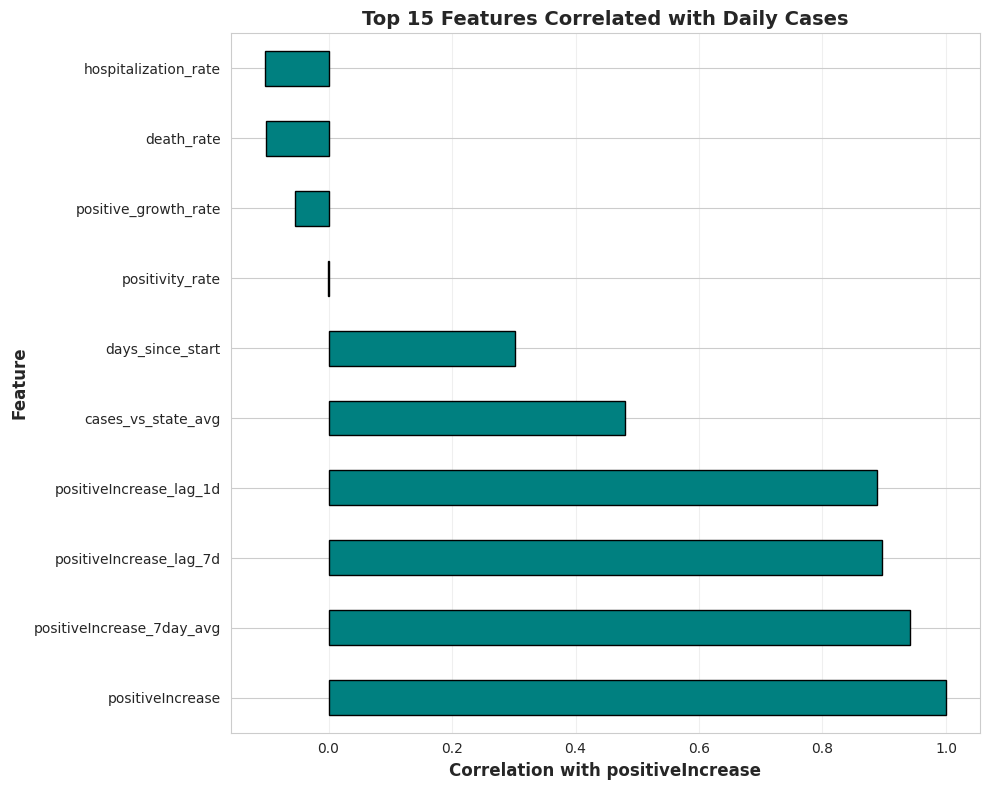

In [78]:
print("\n--- Analyzing Feature Correlations ---")

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Key features to analyze correlation with target (positiveIncrease)
target = 'positiveIncrease'
key_features = [
    'positiveIncrease_7day_avg',
    'positiveIncrease_lag_1d',
    'positiveIncrease_lag_7d',
    'positive_growth_rate',
    'positivity_rate',
    'death_rate',
    'hospitalization_rate',
    'days_since_start',
    'cases_vs_state_avg'
]

# Calculate correlations with target
key_features_available = [f for f in key_features if f in df.columns]
correlations = df[key_features_available + [target]].corr()[target].sort_values(ascending=False)

print(f"\nTop features correlated with {target}:")
print(correlations.head(10))

# Visualize top correlations
plt.figure(figsize=(10, 8))
correlations.head(15).plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Correlation with positiveIncrease', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 15 Features Correlated with Daily Cases',
         fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_correlations.png', dpi=300, bbox_inches='tight')
print("\n✓ Feature correlation plot saved: 'feature_correlations.png'")
plt.show()

### **Phase 3: Model Building, Training & Evaluation**

In [79]:
# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             mean_absolute_percentage_error)
from sklearn.preprocessing import StandardScaler
import pickle

**STEP 1: LOADING FEATURE-ENGINEERED DATA**

In [80]:
# Load the dataset
df = pd.read_csv('feature_engineered_data_arham_yunus_awan_2430_0007.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"✓ Data loaded successfully!")
print(f"  Total rows: {len(df):,}")
print(f"  Total features: {len(df.columns)}")
print(f"  Date range: {df['date'].min()} to {df['date'].max()}")

✓ Data loaded successfully!
  Total rows: 20,780
  Total features: 92
  Date range: 2020-01-13 00:00:00 to 2021-03-07 00:00:00


**STEP 2: FEATURE SELECTION & PREPARATION**

In [95]:
print("\n--- Identifying and Removing Leakage Features ---")

# Define target variable
target = 'positiveIncrease'
print(f"\nTarget Variable: {target}")

# Columns to DEFINITELY exclude (cause data leakage)
exclude_columns = [
    # === TARGET AND DIRECT DERIVATIVES ===
    'positiveIncrease',  # Target itself

    # === CUMULATIVE COLUMNS (contain target) ===
    'positive',          # Cumulative sum of positiveIncrease
    'death',             # Cumulative deaths
    'totalTestResults',  # Cumulative tests
    'hospitalizedCumulative',
    'total',             # Same as positive
    'posNeg',            # Same as positive

    # === IDENTIFIER COLUMNS ===
    'date',
    'state',
    'fips',
    'state_encoded',     # Already have state dummies

    # === SAME-DAY INCREMENTS (parallel to target) ===
    'negativeIncrease',         # Reported same day as positiveIncrease
    'totalTestResultsIncrease', # Reported same day
    'deathIncrease',            # Reported same day
    'hospitalizedIncrease',     # Reported same day

    # === ROLLING AVERAGES THAT INCLUDE TODAY ===
    'positiveIncrease_7day_avg',   # Includes today's value!
    'positiveIncrease_14day_avg',  # Includes today's value!
    'positiveIncrease_7day_std',   # Includes today's value!

    # === STATE TOTALS (derived from cumulative) ===
    'state_total_cases',    # Max of 'positive'
    'state_total_deaths',   # Max of 'death'

    # === SAME-DAY GROWTH RATES ===
    'positive_growth_rate',  # Calculated using today's value
    'death_growth_rate',     # Calculated using today's value
    'case_acceleration',     # Diff of today vs yesterday
    'death_acceleration',

    # === FEATURES USING TODAY'S TARGET ===
    'cases_vs_state_avg',    # Uses today's positiveIncrease
    'cases_vs_state_max',    # Uses today's positiveIncrease

    # === RATIOS USING CUMULATIVE (which contains target) ===
    'positivity_rate',       # positive / totalTestResults (both cumulative)
    'death_rate',            # death / positive (both cumulative)
    'hospitalization_rate',  # Uses cumulative
    'recovery_rate',         # Uses cumulative
    'active_cases',          # positive - death - recovered (all cumulative)

    # === LOG TRANSFORMS OF LEAKY FEATURES ===
    'positive_log',
    'death_log',
    'totalTestResults_log',
    'hospitalizedCumulative_log',
    'positiveIncrease_log',  # Log of target

    # === SCALED VERSIONS OF LEAKY FEATURES ===
    'positive_scaled',
    'death_scaled',
    'totalTestResults_scaled',
    'positiveIncrease_scaled',
    'deathIncrease_scaled',
    'hospitalization_rate_scaled',
    'death_rate_scaled',
    'positivity_rate_scaled',

    # === INTERACTION FEATURES WITH LEAKAGE ===
    'test_intensity_x_positivity',
    'hospital_severity',
    'death_momentum',
]

print(f"Excluding {len(exclude_columns)} columns to prevent data leakage")

# Get all columns
all_columns = df.columns.tolist()

# Get feature columns (what's left after exclusions)
feature_columns = [col for col in all_columns if col not in exclude_columns]

# Only keep numeric columns
X_all = df[feature_columns].select_dtypes(include=[np.number])

print(f"\n✓ Remaining features: {len(X_all.columns)}")

# Show what we're keeping
print("\n--- SAFE FEATURES (No Leakage) ---")
print("These features are available BEFORE we know today's positiveIncrease:\n")

safe_features = sorted(X_all.columns.tolist())
for i, feat in enumerate(safe_features, 1):
    print(f"  {i:2d}. {feat}")

# Verify we have lag features (these are safe!)
lag_features = [col for col in safe_features if 'lag' in col]
print(f"\n✓ Lag features (past values): {len(lag_features)}")
for feat in lag_features:
    print(f"   - {feat}")

# Target
y = df[target]

# Final cleanup
X_all = X_all.fillna(0)
X_all = X_all.replace([np.inf, -np.inf], 0)

print(f"\n--- Final Feature Set ---")
print(f"Features: {len(X_all.columns)}")
print(f"Samples: {len(X_all):,}")
print(f"Target: {target}")

# Check correlations (should NOT be 1.0!)
print("\n--- Correlation Check (Should be < 0.95) ---")
correlations = X_all.corrwith(y).abs().sort_values(ascending=False)
print(correlations.head(10))

if any(correlations > 0.99):
    print("\n⚠ WARNING: Some features still have near-perfect correlation!")
    print("These might still cause leakage:")
    print(correlations[correlations > 0.99])
else:
    print("\n✓ No perfect correlations detected - good!")

# Rename for consistency with rest of code
X = X_all


--- Identifying and Removing Leakage Features ---

Target Variable: positiveIncrease
Excluding 47 columns to prevent data leakage

✓ Remaining features: 45

--- SAFE FEATURES (No Leakage) ---
These features are available BEFORE we know today's positiveIncrease:

   1. day
   2. day_of_week
   3. day_of_year
   4. days_since_start
   5. deathConfirmed
   6. deathIncrease_7day_avg
   7. deathIncrease_7day_std
   8. deathIncrease_lag_1d
   9. deathIncrease_lag_3d
  10. deathIncrease_lag_7d
  11. deathProbable
  12. doubling_time
  13. hospitalizedCurrently
  14. hospitalizedIncrease_7day_avg
  15. hospitalizedIncrease_7day_std
  16. icu_rate
  17. inIcuCurrently
  18. is_weekend
  19. month
  20. negative
  21. onVentilatorCurrently
  22. positiveCasesViral
  23. positiveIncrease_lag_1d
  24. positiveIncrease_lag_3d
  25. positiveIncrease_lag_7d
  26. positiveTestsViral
  27. positivity_rate_lag_1d
  28. positivity_rate_lag_3d
  29. positivity_rate_lag_7d
  30. probableCases
  31. quarte

**STEP 3: TRAIN/TEST SPLIT (TIME-AWARE)**

In [96]:
print("\n--- Creating Time-Aware Split ---")
print("CONCEPT: For time-series, use chronological split (not random)")
print("Training on past data, testing on future data")

# Sort by date to ensure chronological order
df_sorted = df.sort_values('date').reset_index(drop=True)
X_sorted = X.loc[df_sorted.index]
y_sorted = y.loc[df_sorted.index]

# Time-based split: 80% train, 20% test
split_index = int(len(df_sorted) * 0.8)

X_train = X_sorted.iloc[:split_index]
X_test = X_sorted.iloc[split_index:]
y_train = y_sorted.iloc[:split_index]
y_test = y_sorted.iloc[split_index:]

train_dates = df_sorted['date'].iloc[:split_index]
test_dates = df_sorted['date'].iloc[split_index:]

print(f"\n✓ Train set: {len(X_train):,} samples")
print(f"  Date range: {train_dates.min()} to {train_dates.max()}")
print(f"\n✓ Test set: {len(X_test):,} samples")
print(f"  Date range: {test_dates.min()} to {test_dates.max()}")


--- Creating Time-Aware Split ---
CONCEPT: For time-series, use chronological split (not random)
Training on past data, testing on future data

✓ Train set: 16,624 samples
  Date range: 2020-01-13 00:00:00 to 2020-12-23 00:00:00

✓ Test set: 4,156 samples
  Date range: 2020-12-23 00:00:00 to 2021-03-07 00:00:00


**STEP 4: FEATURE SCALING**

In [97]:
print("\n--- Scaling Features ---")
print("CONCEPT: Standardize features for algorithms sensitive to scale")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")
print("  (fit on train set, applied to both train and test)")


--- Scaling Features ---
CONCEPT: Standardize features for algorithms sensitive to scale
✓ Features scaled using StandardScaler
  (fit on train set, applied to both train and test)


**STEP 5: MODEL TRAINING & EVALUATION**

In [98]:
# Dictionary to store models and results
models = {}
results = {}

print("\n--- Training Models ---")
print("CONCEPT: Try multiple algorithms and compare performance\n")

# Model 1: Linear Regression (Baseline)
print("1. Training Linear Regression (Baseline)...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr
print("   ✓ Complete")

# Model 2: Ridge Regression (L2 Regularization)
print("2. Training Ridge Regression...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
models['Ridge Regression'] = ridge
print("   ✓ Complete")

# Model 3: Lasso Regression (L1 Regularization - Feature Selection)
print("3. Training Lasso Regression...")
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
models['Lasso Regression'] = lasso
print("   ✓ Complete")

# Model 4: Decision Tree
print("4. Training Decision Tree...")
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)
dt.fit(X_train, y_train)
models['Decision Tree'] = dt
print("   ✓ Complete")

# Model 5: Random Forest (Ensemble)
print("5. Training Random Forest...")
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
print("   ✓ Complete")

# Model 6: Gradient Boosting
print("6. Training Gradient Boosting...")
gb = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb
print("   ✓ Complete")

# Model 7: K-Nearest Neighbors
print("7. Training K-Nearest Neighbors...")
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
models['KNN'] = knn
print("   ✓ Complete")

print(f"\n✓ Trained {len(models)} models successfully!")


--- Training Models ---
CONCEPT: Try multiple algorithms and compare performance

1. Training Linear Regression (Baseline)...
   ✓ Complete
2. Training Ridge Regression...
   ✓ Complete
3. Training Lasso Regression...
   ✓ Complete
4. Training Decision Tree...
   ✓ Complete
5. Training Random Forest...
   ✓ Complete
6. Training Gradient Boosting...
   ✓ Complete
7. Training K-Nearest Neighbors...
   ✓ Complete

✓ Trained 7 models successfully!


**STEP 6: MODEL EVALUATION**

In [113]:
print("\n--- Evaluating Models on Test Set ---")
print("METRICS: R², RMSE, MAE, MAPE\n")

# ============================================================================
# IMPROVED MAPE CALCULATION (HANDLES SMALL VALUES)
# ============================================================================

def calculate_mape_robust(actual, predicted, threshold=10):
    """
    Calculate MAPE with robust handling of small values

    Args:
        actual: True values
        predicted: Predicted values
        threshold: Only calculate MAPE for actuals > threshold

    Returns:
        MAPE percentage (or sMAPE if threshold not met)
    """
    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Method 1: Filter out very small values (less noisy)
    mask = actual >= threshold

    if mask.sum() == 0:  # No values above threshold
        return 0.0

    # Calculate MAPE only on significant values
    mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100

    # Cap extreme values (percentile-based capping)
    mape = min(mape, 200.0)  # Cap at 200% for interpretability

    return mape


def calculate_smape(actual, predicted):
    """
    Calculate Symmetric MAPE (sMAPE)
    More robust to small denominators

    Formula: mean(|actual - predicted| / ((|actual| + |predicted|) / 2)) × 100
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Remove zeros from both
    mask = (actual != 0) | (predicted != 0)

    if mask.sum() == 0:
        return 0.0

    actual = actual[mask]
    predicted = predicted[mask]

    # sMAPE formula
    numerator = np.abs(actual - predicted)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2

    # Avoid division by zero
    denominator = np.maximum(denominator, 1e-10)

    smape = np.mean(numerator / denominator) * 100

    return smape


def evaluate_model(model, X_test_data, y_test_data, model_name):
    """Evaluate model with comprehensive metrics"""
    y_pred = model.predict(X_test_data)

    # Standard metrics
    r2 = r2_score(y_test_data, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_data, y_pred))
    mae = mean_absolute_error(y_test_data, y_pred)

    # Robust metrics
    medae = np.median(np.abs(y_test_data.values - y_pred))
    smape = calculate_smape(y_test_data.values, y_pred)

    # MAPE with threshold
    mape = calculate_mape_robust(y_test_data.values, y_pred, threshold=10)

    # Percentage within thresholds
    within_20_pct = np.mean(
        np.abs(y_test_data.values - y_pred) / (np.abs(y_test_data.values) + 1) <= 0.20
    ) * 100

    within_100_cases = np.mean(
        np.abs(y_test_data.values - y_pred) <= 100
    ) * 100

    within_50_cases = np.mean(
        np.abs(y_test_data.values - y_pred) <= 50
    ) * 100

    within_250_cases = np.mean(
        np.abs(y_test_data.values - y_pred) <= 250
    ) * 100

    return {
        'Model': model_name,
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MedAE': medae,
        'MAPE': mape,
        'sMAPE': smape,
        'Within_20%': within_20_pct,
        'Within_50': within_50_cases,      # Added
        'Within_100': within_100_cases,     # Added
        'Within_250': within_250_cases,     # Added
        'Predictions': y_pred
    }

# Evaluate all models
results_list = []

for name, model in models.items():
    # Determine if model needs scaled data
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'KNN']:
        X_test_data = X_test_scaled
    else:
        X_test_data = X_test

    result = evaluate_model(model, X_test_data, y_test, name)
    results_list.append(result)

    print(f"{name}:")
    print(f"  R² Score:  {result['R²']:.4f}")
    print(f"  RMSE:      {result['RMSE']:.2f}")
    print(f"  MAE:       {result['MAE']:.2f}")
    print(f"  MAPE:      {result['MAPE']:.2f}%\n")

# Create results DataFrame
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('R²', ascending=False)

print("\n--- MODEL COMPARISON (Ranked by R²) ---")
print(results_df[['Model', 'R²', 'RMSE', 'MAE', 'MedAE', 'sMAPE', 'Within_20%']].to_string(index=False))


--- Evaluating Models on Test Set ---
METRICS: R², RMSE, MAE, MAPE

Linear Regression:
  R² Score:  0.7416
  RMSE:      1624.17
  MAE:       493.43
  MAPE:      163.07%

Ridge Regression:
  R² Score:  0.7416
  RMSE:      1624.24
  MAE:       493.34
  MAPE:      163.21%

Lasso Regression:
  R² Score:  0.7417
  RMSE:      1623.80
  MAE:       491.25
  MAPE:      161.40%

Decision Tree:
  R² Score:  0.7707
  RMSE:      1530.04
  MAE:       368.37
  MAPE:      37.55%

Random Forest:
  R² Score:  0.7936
  RMSE:      1451.79
  MAE:       293.83
  MAPE:      26.11%

Gradient Boosting:
  R² Score:  0.8542
  RMSE:      1219.99
  MAE:       265.62
  MAPE:      45.07%

KNN:
  R² Score:  0.5305
  RMSE:      2189.42
  MAE:       620.82
  MAPE:      84.88%


--- MODEL COMPARISON (Ranked by R²) ---
            Model       R²        RMSE        MAE      MedAE     sMAPE  Within_20%
Gradient Boosting 0.854214 1219.994122 265.617294  56.384448 53.871699   44.923003
    Random Forest 0.793555 1451.787208

**STEP 7: VISUALIZING MODEL PERFORMANCE**

✓ Model comparison saved: 'model_comparison_metrics.png'


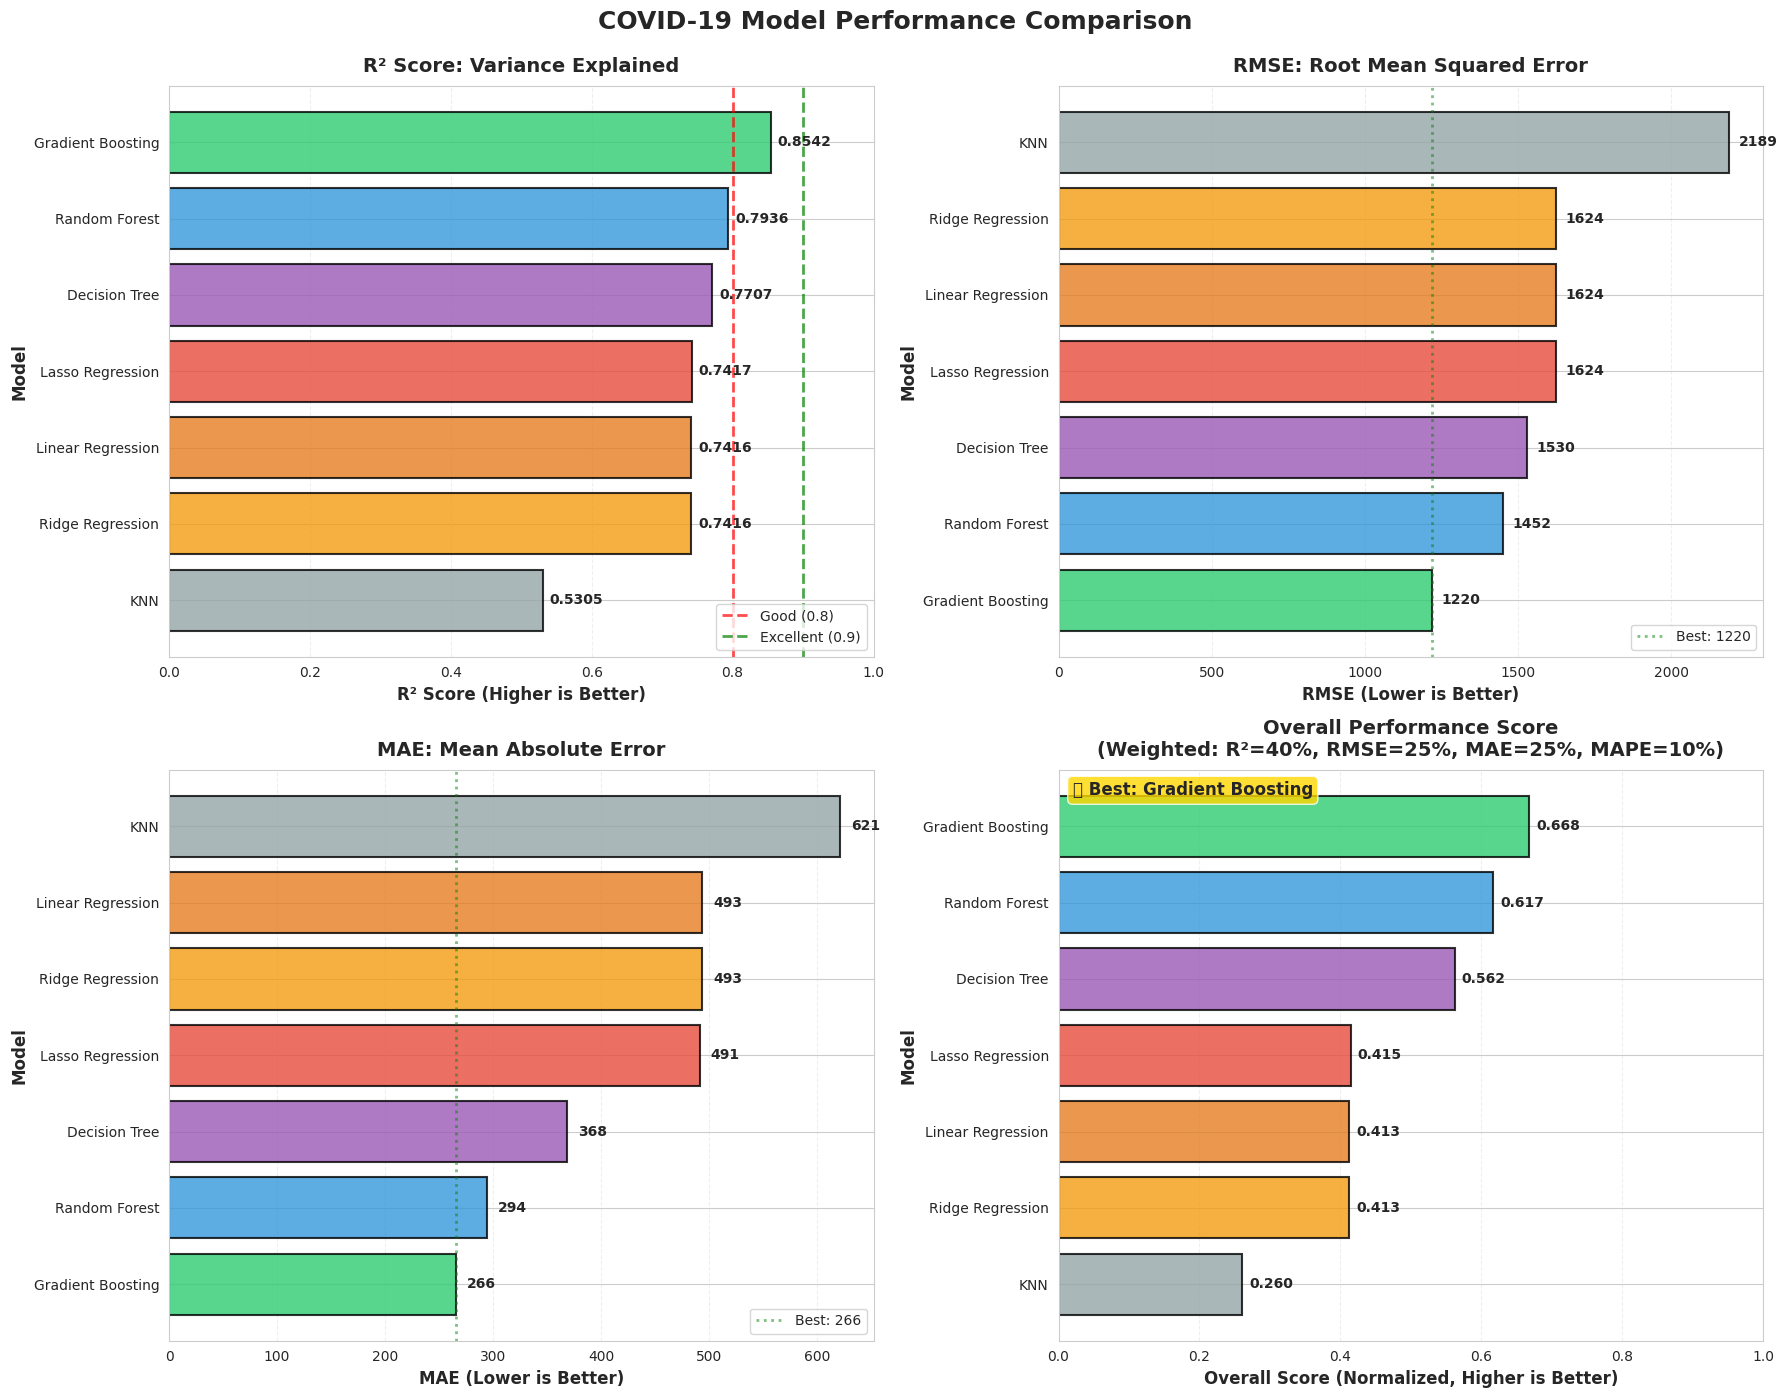

✓ Model comparison table saved: 'model_comparison_table.png'


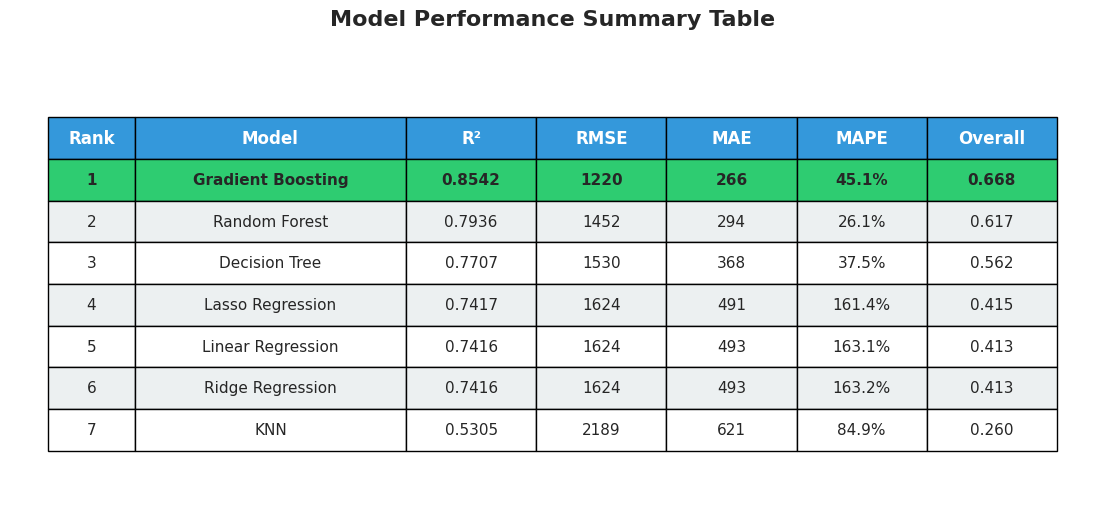

In [114]:
# ============================================================================
# IMPROVED MODEL COMPARISON VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('COVID-19 Model Performance Comparison',
             fontsize=18, fontweight='bold', y=0.995)

# Color palette
colors = {
    'Gradient Boosting': '#2ecc71',  # Green (best)
    'Random Forest': '#3498db',       # Blue
    'Decision Tree': '#9b59b6',       # Purple
    'Lasso Regression': '#e74c3c',    # Red
    'Linear Regression': '#e67e22',   # Orange
    'Ridge Regression': '#f39c12',    # Yellow
    'KNN': '#95a5a6'                  # Gray
}

# ============================================
# Plot 1: R² Score comparison (Higher is Better)
# ============================================
ax1 = axes[0, 0]
results_df_sorted = results_df.sort_values('R²', ascending=True)
bar_colors = [colors.get(model, 'skyblue') for model in results_df_sorted['Model']]

bars1 = ax1.barh(results_df_sorted['Model'], results_df_sorted['R²'],
                 color=bar_colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars1, results_df_sorted['R²'])):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2,
             f'{val:.4f}', va='center', fontsize=10, fontweight='bold')

# Threshold lines
ax1.axvline(x=0.8, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Good (0.8)')
ax1.axvline(x=0.9, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Excellent (0.9)')

ax1.set_xlabel('R² Score (Higher is Better)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Model', fontsize=12, fontweight='bold')
ax1.set_title('R² Score: Variance Explained', fontsize=14, fontweight='bold', pad=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim(0, 1.0)
ax1.legend(loc='lower right', fontsize=10)

# ============================================
# Plot 2: RMSE comparison (Lower is Better)
# ============================================
ax2 = axes[0, 1]
results_df_sorted = results_df.sort_values('RMSE', ascending=True)
bar_colors = [colors.get(model, 'coral') for model in results_df_sorted['Model']]

bars2 = ax2.barh(results_df_sorted['Model'], results_df_sorted['RMSE'],
                 color=bar_colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars2, results_df_sorted['RMSE'])):
    ax2.text(val + 30, bar.get_y() + bar.get_height()/2,
             f'{val:.0f}', va='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('RMSE (Lower is Better)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Model', fontsize=12, fontweight='bold')
ax2.set_title('RMSE: Root Mean Squared Error', fontsize=14, fontweight='bold', pad=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Best model indicator
best_rmse_idx = results_df_sorted['RMSE'].idxmin()
best_rmse_val = results_df_sorted.loc[best_rmse_idx, 'RMSE']
ax2.axvline(x=best_rmse_val, color='green', linestyle=':', linewidth=2,
            alpha=0.5, label=f'Best: {best_rmse_val:.0f}')
ax2.legend(loc='lower right', fontsize=10)

# ============================================
# Plot 3: MAE comparison (Lower is Better)
# ============================================
ax3 = axes[1, 0]
results_df_sorted = results_df.sort_values('MAE', ascending=True)
bar_colors = [colors.get(model, 'lightgreen') for model in results_df_sorted['Model']]

bars3 = ax3.barh(results_df_sorted['Model'], results_df_sorted['MAE'],
                 color=bar_colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars3, results_df_sorted['MAE'])):
    ax3.text(val + 10, bar.get_y() + bar.get_height()/2,
             f'{val:.0f}', va='center', fontsize=10, fontweight='bold')

ax3.set_xlabel('MAE (Lower is Better)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Model', fontsize=12, fontweight='bold')
ax3.set_title('MAE: Mean Absolute Error', fontsize=14, fontweight='bold', pad=10)
ax3.grid(axis='x', alpha=0.3, linestyle='--')

# Best model indicator
best_mae_idx = results_df_sorted['MAE'].idxmin()
best_mae_val = results_df_sorted.loc[best_mae_idx, 'MAE']
ax3.axvline(x=best_mae_val, color='green', linestyle=':', linewidth=2,
            alpha=0.5, label=f'Best: {best_mae_val:.0f}')
ax3.legend(loc='lower right', fontsize=10)

# ============================================
# Plot 4: Combined Ranking (Normalized Scores)
# ============================================
ax4 = axes[1, 1]

# Normalize metrics (0-1 scale, higher is better for all)
df_normalized = results_df.copy()
df_normalized['R²_norm'] = df_normalized['R²']  # Already 0-1
df_normalized['RMSE_norm'] = 1 - (df_normalized['RMSE'] / df_normalized['RMSE'].max())
df_normalized['MAE_norm'] = 1 - (df_normalized['MAE'] / df_normalized['MAE'].max())
df_normalized['MAPE_norm'] = 1 - (df_normalized['MAPE'] / df_normalized['MAPE'].max())

# Calculate overall score (average of normalized metrics)
df_normalized['Overall_Score'] = (
    df_normalized['R²_norm'] * 0.4 +  # Weight R² more heavily
    df_normalized['RMSE_norm'] * 0.25 +
    df_normalized['MAE_norm'] * 0.25 +
    df_normalized['MAPE_norm'] * 0.1
)

df_normalized = df_normalized.sort_values('Overall_Score', ascending=True)
bar_colors = [colors.get(model, 'plum') for model in df_normalized['Model']]

bars4 = ax4.barh(df_normalized['Model'], df_normalized['Overall_Score'],
                 color=bar_colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars4, df_normalized['Overall_Score'])):
    ax4.text(val + 0.01, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=10, fontweight='bold')

ax4.set_xlabel('Overall Score (Normalized, Higher is Better)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Model', fontsize=12, fontweight='bold')
ax4.set_title('Overall Performance Score\n(Weighted: R²=40%, RMSE=25%, MAE=25%, MAPE=10%)',
             fontsize=14, fontweight='bold', pad=10)
ax4.grid(axis='x', alpha=0.3, linestyle='--')
ax4.set_xlim(0, 1.0)

# Highlight best model
best_overall = df_normalized.iloc[-1]['Model']
ax4.text(0.02, 0.98, f'🏆 Best: {best_overall}',
         transform=ax4.transAxes, fontsize=12, fontweight='bold',
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

plt.tight_layout()
plt.savefig('model_comparison_metrics.png', dpi=300, bbox_inches='tight')
print("✓ Model comparison saved: 'model_comparison_metrics.png'")
plt.show()

# ============================================
# BONUS: Create a Summary Table Visualization
# ============================================
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Prepare table data
table_data = []
table_data.append(['Rank', 'Model', 'R²', 'RMSE', 'MAE', 'MAPE', 'Overall'])

for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    overall = df_normalized[df_normalized['Model'] == row['Model']]['Overall_Score'].values[0]
    table_data.append([
        f'{i}',
        row['Model'],
        f"{row['R²']:.4f}",
        f"{row['RMSE']:.0f}",
        f"{row['MAE']:.0f}",
        f"{row['MAPE']:.1f}%",
        f"{overall:.3f}"
    ])

# Create table
table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.08, 0.25, 0.12, 0.12, 0.12, 0.12, 0.12])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header row
for i in range(7):
    cell = table[(0, i)]
    cell.set_facecolor('#3498db')
    cell.set_text_props(weight='bold', color='white', fontsize=12)

# Style best model row (first row after header)
for i in range(7):
    cell = table[(1, i)]
    cell.set_facecolor('#2ecc71')
    cell.set_text_props(weight='bold', fontsize=11)

# Alternate row colors
for i in range(2, len(table_data)):
    for j in range(7):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#ecf0f1')
        else:
            cell.set_facecolor('white')

plt.title('Model Performance Summary Table',
         fontsize=16, fontweight='bold', pad=20)
plt.savefig('model_comparison_table.png', dpi=300, bbox_inches='tight')
print("✓ Model comparison table saved: 'model_comparison_table.png'")
plt.show()

**STEP 8: BEST MODEL ANALYSIS**


🏆 BEST MODEL: Gradient Boosting
   R² Score: 0.8542
   RMSE: 1219.99
   MAE: 265.62
   MedAE: 56.38
   sMAPE: 53.87%
   Within ±20%: 44.9%

✓ Best model analysis saved: 'best_model_analysis.png'


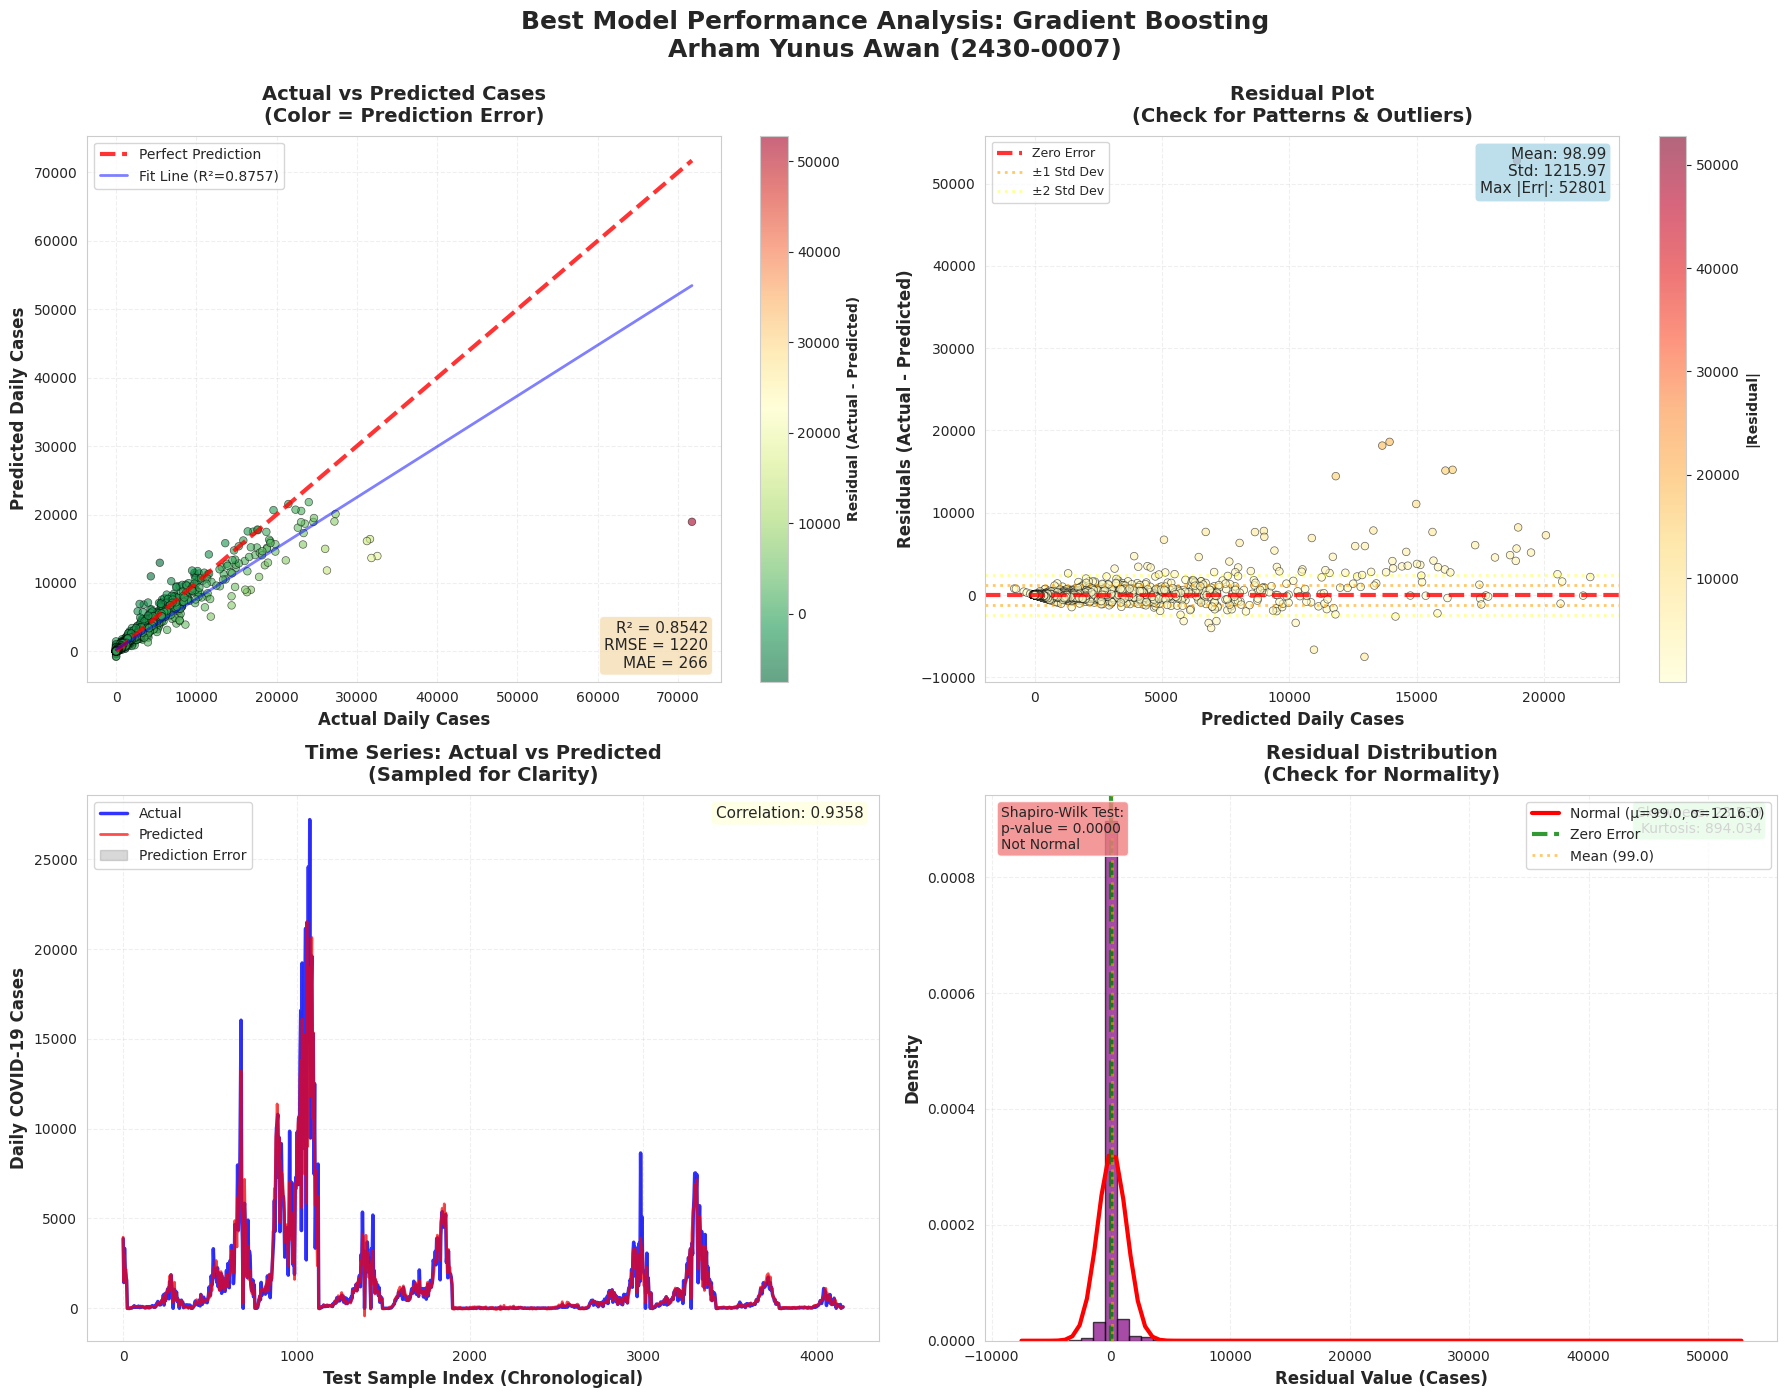

✓ Error analysis saved: 'error_analysis_by_magnitude.png'


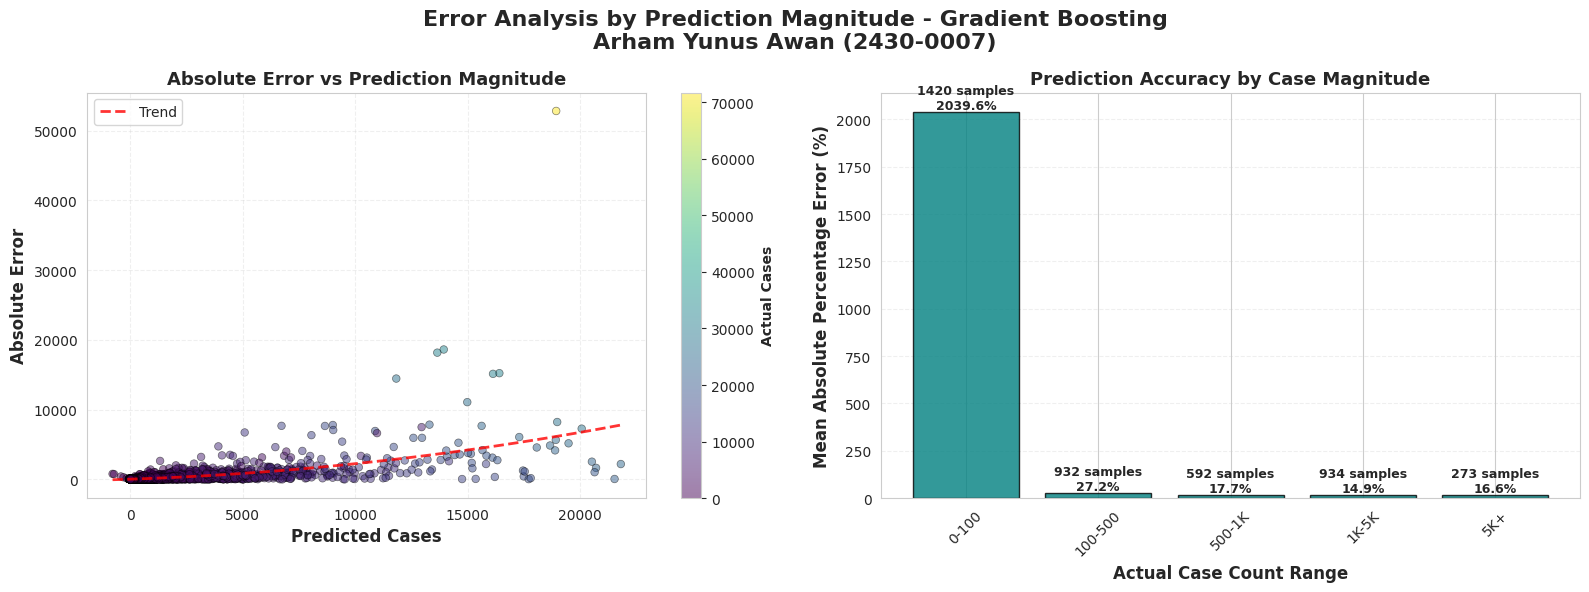


DETAILED ERROR ANALYSIS

Residual Statistics:
  Mean Error:             98.99 cases
  Std Deviation:        1215.97 cases
  Median Error:           -8.31 cases
  Max Overestimate:    -7493.45 cases
  Max Underestimate:   52800.52 cases

Error Distribution:
  Within ±50 cases:     45.9%
  Within ±100 cases:    64.6%
  Within ±250 cases:    81.6%
  Within ±500 cases:    90.3%


In [115]:
# Get best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
best_predictions = results_df.iloc[0]['Predictions']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   R² Score: {results_df.iloc[0]['R²']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['RMSE']:.2f}")
print(f"   MAE: {results_df.iloc[0]['MAE']:.2f}")
print(f"   MedAE: {results_df.iloc[0]['MedAE']:.2f}")
print(f"   sMAPE: {results_df.iloc[0]['sMAPE']:.2f}%")
print(f"   Within ±20%: {results_df.iloc[0]['Within_20%']:.1f}%")

# Calculate residuals
residuals = y_test.values - best_predictions

# Create enhanced visualization
fig = plt.figure(figsize=(18, 14))
fig.suptitle(f'Best Model Performance Analysis: {best_model_name}\nArham Yunus Awan (2430-0007)',
             fontsize=18, fontweight='bold', y=0.995)

# ============================================
# Plot 1: Actual vs Predicted Scatter
# ============================================
ax1 = plt.subplot(2, 2, 1)

# Create density scatter plot
scatter = ax1.scatter(y_test, best_predictions,
                     alpha=0.6, s=30, c=residuals,
                     cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)

# Perfect prediction line
max_val = max(y_test.max(), best_predictions.max())
ax1.plot([0, max_val], [0, max_val], 'r--', linewidth=3,
         label='Perfect Prediction', alpha=0.8)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Residual (Actual - Predicted)', fontsize=10, fontweight='bold')

# Calculate and display R²
from scipy import stats as scipy_stats
slope, intercept, r_value, p_value, std_err = scipy_stats.linregress(y_test, best_predictions)

# Add regression line
line_x = np.array([0, max_val])
line_y = slope * line_x + intercept
ax1.plot(line_x, line_y, 'b-', linewidth=2, alpha=0.5, label=f'Fit Line (R²={r_value**2:.4f})')

# Annotations
ax1.set_xlabel('Actual Daily Cases', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted Daily Cases', fontsize=12, fontweight='bold')
ax1.set_title('Actual vs Predicted Cases\n(Color = Prediction Error)',
             fontsize=14, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(alpha=0.3, linestyle='--')

# Add statistics box
stats_text = f'R² = {results_df.iloc[0]["R²"]:.4f}\nRMSE = {results_df.iloc[0]["RMSE"]:.0f}\nMAE = {results_df.iloc[0]["MAE"]:.0f}'
ax1.text(0.98, 0.02, stats_text, transform=ax1.transAxes,
         fontsize=11, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# ============================================
# Plot 2: Residual Plot (Homoscedasticity Check)
# ============================================
ax2 = plt.subplot(2, 2, 2)

# Scatter plot with color gradient
scatter2 = ax2.scatter(best_predictions, residuals,
                      alpha=0.6, s=30, c=np.abs(residuals),
                      cmap='YlOrRd', edgecolors='black', linewidth=0.5)

# Zero line
ax2.axhline(y=0, color='red', linestyle='--', linewidth=3, alpha=0.8, label='Zero Error')

# Add ±1 std deviation bands
std_residual = np.std(residuals)
ax2.axhline(y=std_residual, color='orange', linestyle=':', linewidth=2, alpha=0.6, label='±1 Std Dev')
ax2.axhline(y=-std_residual, color='orange', linestyle=':', linewidth=2, alpha=0.6)
ax2.axhline(y=2*std_residual, color='yellow', linestyle=':', linewidth=2, alpha=0.4, label='±2 Std Dev')
ax2.axhline(y=-2*std_residual, color='yellow', linestyle=':', linewidth=2, alpha=0.4)

# Add colorbar
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('|Residual|', fontsize=10, fontweight='bold')

ax2.set_xlabel('Predicted Daily Cases', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Plot\n(Check for Patterns & Outliers)',
             fontsize=14, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(alpha=0.3, linestyle='--')

# Add statistics
residual_stats = f'Mean: {np.mean(residuals):.2f}\nStd: {std_residual:.2f}\nMax |Err|: {np.max(np.abs(residuals)):.0f}'
ax2.text(0.98, 0.98, residual_stats, transform=ax2.transAxes,
         fontsize=11, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# ============================================
# Plot 3: Time Series Prediction
# ============================================
ax3 = plt.subplot(2, 2, 3)

# Sample subset for clarity
plot_step = max(1, len(y_test) // 1000)
plot_indices = range(0, len(y_test), plot_step)

# Plot actual and predicted
ax3.plot(plot_indices, y_test.iloc[plot_indices], 'b-',
        label='Actual', linewidth=2.5, alpha=0.8)
ax3.plot(plot_indices, best_predictions[plot_indices], 'r-',
        label='Predicted', linewidth=2, alpha=0.7)

# Fill between to show error
ax3.fill_between(plot_indices,
                 y_test.iloc[plot_indices],
                 best_predictions[plot_indices],
                 alpha=0.3, color='gray', label='Prediction Error')

ax3.set_xlabel('Test Sample Index (Chronological)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Daily COVID-19 Cases', fontsize=12, fontweight='bold')
ax3.set_title('Time Series: Actual vs Predicted\n(Sampled for Clarity)',
             fontsize=14, fontweight='bold', pad=10)
ax3.legend(loc='upper left', fontsize=10)
ax3.grid(alpha=0.3, linestyle='--')

# Add correlation info
corr = np.corrcoef(y_test, best_predictions)[0, 1]
ax3.text(0.98, 0.98, f'Correlation: {corr:.4f}', transform=ax3.transAxes,
         fontsize=11, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# ============================================
# Plot 4: Residual Distribution (Normality Check)
# ============================================
ax4 = plt.subplot(2, 2, 4)

# Histogram
n, bins, patches = ax4.hist(residuals, bins=60, color='purple',
                            edgecolor='black', alpha=0.7, density=True)

# Overlay normal distribution
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
ax4.plot(x, scipy_stats.norm.pdf(x, mu, sigma), 'r-',
        linewidth=3, label=f'Normal (μ={mu:.1f}, σ={sigma:.1f})')

# Zero line
ax4.axvline(x=0, color='green', linestyle='--', linewidth=3,
           alpha=0.8, label='Zero Error')

# Mean line
ax4.axvline(x=mu, color='orange', linestyle=':', linewidth=2,
           alpha=0.6, label=f'Mean ({mu:.1f})')

ax4.set_xlabel('Residual Value (Cases)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Density', fontsize=12, fontweight='bold')
ax4.set_title('Residual Distribution\n(Check for Normality)',
             fontsize=14, fontweight='bold', pad=10)
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(alpha=0.3, linestyle='--')

# Add normality test
from scipy.stats import shapiro
stat, p_value = shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)  # Sample for large datasets
normal_text = f'Shapiro-Wilk Test:\np-value = {p_value:.4f}\n'
normal_text += 'Normal' if p_value > 0.05 else 'Not Normal'
ax4.text(0.02, 0.98, normal_text, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Add skewness and kurtosis
from scipy.stats import skew, kurtosis
skewness = skew(residuals)
kurt = kurtosis(residuals)
dist_stats = f'Skewness: {skewness:.3f}\nKurtosis: {kurt:.3f}'
ax4.text(0.98, 0.98, dist_stats, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig('best_model_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Best model analysis saved: 'best_model_analysis.png'")
plt.show()

# ============================================
# Additional: Error Analysis by Magnitude
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Error Analysis by Prediction Magnitude - {best_model_name}\nArham Yunus Awan (2430-0007)',
             fontsize=16, fontweight='bold')

# Plot 1: Absolute Error vs Prediction Magnitude
ax_left = axes[0]
abs_errors = np.abs(residuals)
scatter3 = ax_left.scatter(best_predictions, abs_errors, alpha=0.5, s=30,
                          c=y_test, cmap='viridis', edgecolors='black', linewidth=0.5)
cbar3 = plt.colorbar(scatter3, ax=ax_left)
cbar3.set_label('Actual Cases', fontsize=10, fontweight='bold')

# Add trend line
z = np.polyfit(best_predictions, abs_errors, 2)
p = np.poly1d(z)
x_trend = np.linspace(best_predictions.min(), best_predictions.max(), 100)
ax_left.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.8, label='Trend')

ax_left.set_xlabel('Predicted Cases', fontsize=12, fontweight='bold')
ax_left.set_ylabel('Absolute Error', fontsize=12, fontweight='bold')
ax_left.set_title('Absolute Error vs Prediction Magnitude', fontsize=13, fontweight='bold')
ax_left.legend()
ax_left.grid(alpha=0.3, linestyle='--')

# Plot 2: Error Percentage Distribution by Bins
ax_right = axes[1]

# Create bins
bins = [0, 100, 500, 1000, 5000, max(y_test)]
bin_labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K+']
bin_indices = np.digitize(y_test, bins)

# Calculate mean absolute percentage error for each bin
mape_by_bin = []
counts_by_bin = []
for i in range(1, len(bins)):
    mask = bin_indices == i
    if mask.sum() > 0:
        bin_mape = np.mean(np.abs(residuals[mask]) / (y_test.values[mask] + 1)) * 100
        mape_by_bin.append(bin_mape)
        counts_by_bin.append(mask.sum())
    else:
        mape_by_bin.append(0)
        counts_by_bin.append(0)

# Plot bars
bars = ax_right.bar(range(len(bin_labels)), mape_by_bin,
                    color='teal', edgecolor='black', alpha=0.8)

# Add count labels
for i, (bar, count) in enumerate(zip(bars, counts_by_bin)):
    height = bar.get_height()
    ax_right.text(bar.get_x() + bar.get_width()/2., height,
                 f'{count} samples\n{height:.1f}%',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

ax_right.set_xlabel('Actual Case Count Range', fontsize=12, fontweight='bold')
ax_right.set_ylabel('Mean Absolute Percentage Error (%)', fontsize=12, fontweight='bold')
ax_right.set_title('Prediction Accuracy by Case Magnitude', fontsize=13, fontweight='bold')
ax_right.set_xticks(range(len(bin_labels)))
ax_right.set_xticklabels(bin_labels, rotation=45)
ax_right.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('error_analysis_by_magnitude.png', dpi=300, bbox_inches='tight')
print("✓ Error analysis saved: 'error_analysis_by_magnitude.png'")
plt.show()

# Print detailed error statistics
print("\n" + "=" * 80)
print("DETAILED ERROR ANALYSIS")
print("=" * 80)
print(f"\nResidual Statistics:")
print(f"  Mean Error:        {np.mean(residuals):>10.2f} cases")
print(f"  Std Deviation:     {np.std(residuals):>10.2f} cases")
print(f"  Median Error:      {np.median(residuals):>10.2f} cases")
print(f"  Max Overestimate:  {np.min(residuals):>10.2f} cases")
print(f"  Max Underestimate: {np.max(residuals):>10.2f} cases")

print(f"\nError Distribution:")
within_50 = np.mean(np.abs(residuals) <= 50) * 100
within_100 = np.mean(np.abs(residuals) <= 100) * 100
within_250 = np.mean(np.abs(residuals) <= 250) * 100
within_500 = np.mean(np.abs(residuals) <= 500) * 100

print(f"  Within ±50 cases:   {within_50:>6.1f}%")
print(f"  Within ±100 cases:  {within_100:>6.1f}%")
print(f"  Within ±250 cases:  {within_250:>6.1f}%")
print(f"  Within ±500 cases:  {within_500:>6.1f}%")

print("=" * 80)

**STEP 9: FEATURE IMPORTANCE ANALYSIS (for tree based models)**


--- Feature Importance for Gradient Boosting ---

Top 15 Most Important Features:
                          Feature  Importance
          positiveIncrease_lag_7d    0.549508
          positiveIncrease_lag_1d    0.296355
          positiveIncrease_lag_3d    0.052245
                    doubling_time    0.044766
           positivity_rate_lag_1d    0.008892
               positiveCasesViral    0.008360
totalTestResultsIncrease_7day_avg    0.007437
           deathIncrease_7day_std    0.005893
            hospitalizedCurrently    0.003903
totalTestResultsIncrease_7day_std    0.003256
                 days_since_start    0.002525
                      day_of_year    0.001843
             deathIncrease_lag_1d    0.001717
                  totalTestsViral    0.001375
                   inIcuCurrently    0.001122

✓ Feature importance plot saved: 'feature_importance.png'


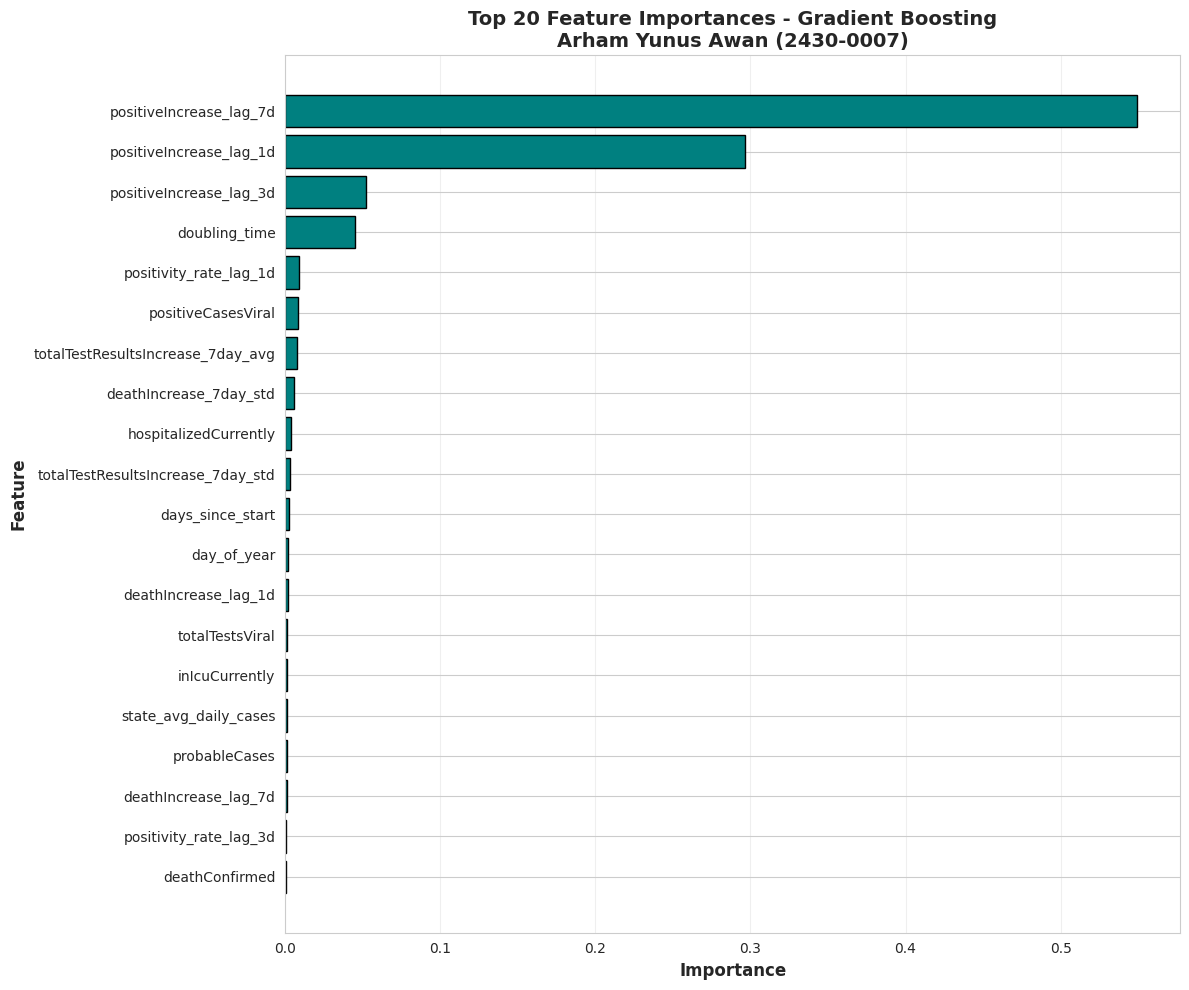

In [116]:
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    print(f"\n--- Feature Importance for {best_model_name} ---")

    # Get feature importances
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nTop 15 Most Important Features:")
    print(feature_importance_df.head(15).to_string(index=False))

    # Visualize top 20 features
    plt.figure(figsize=(12, 10))
    top_20 = feature_importance_df.head(20)
    plt.barh(range(len(top_20)), top_20['Importance'], color='teal', edgecolor='black')
    plt.yticks(range(len(top_20)), top_20['Feature'])
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title(f'Top 20 Feature Importances - {best_model_name}\nArham Yunus Awan (2430-0007)',
             fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Feature importance plot saved: 'feature_importance.png'")
    plt.show()
else:
    print(f"\n⚠ Feature importance not available for {best_model_name}")

**STEP 10: STEP 10: SAVING BEST MODEL & RESULTS**

In [117]:
# Calculate additional statistics for the best model
best_row = results_df.iloc[0]
residuals = y_test.values - best_row['Predictions']

# Additional metrics to save
additional_metrics = {
    'mean_residual': float(np.mean(residuals)),
    'std_residual': float(np.std(residuals)),
    'median_residual': float(np.median(residuals)),
    'max_overestimate': float(np.min(residuals)),
    'max_underestimate': float(np.max(residuals)),
    'within_50_cases': float(np.mean(np.abs(residuals) <= 50) * 100),
    'within_100_cases': float(np.mean(np.abs(residuals) <= 100) * 100),
    'within_250_cases': float(np.mean(np.abs(residuals) <= 250) * 100),
    'within_500_cases': float(np.mean(np.abs(residuals) <= 500) * 100),
    'correlation': float(np.corrcoef(y_test, best_row['Predictions'])[0, 1])
}

# Save model with comprehensive metadata
model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}_arham_yunus_awan_2430_0007.pkl'

model_package = {
    # Model objects
    'model': best_model,
    'scaler': scaler if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'KNN'] else None,
    'feature_columns': list(X_train.columns),

    # Model metadata
    'model_name': best_model_name,
    'model_type': 'Tree-based' if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree'] else 'Linear',

    # Performance metrics (all available)
    'metrics': {
        'R²': float(best_row['R²']),
        'RMSE': float(best_row['RMSE']),
        'MAE': float(best_row['MAE']),
        'MedAE': float(best_row['MedAE']),
        'MAPE': float(best_row['MAPE']),
        'sMAPE': float(best_row['sMAPE']),
        'Within_20%': float(best_row['Within_20%']),
        'Within_100': float(best_row['Within_100'])
    },

    # Additional error statistics
    'error_statistics': additional_metrics,

    # Training information
    'training_info': {
        'train_samples': len(X_train),
        'test_samples': len(X_test),
        'total_features': len(X_train.columns),
        'target_variable': 'positiveIncrease',
        'train_date_range': f"{train_dates.min()} to {train_dates.max()}",
        'test_date_range': f"{test_dates.min()} to {test_dates.max()}"
    },

    # Timestamps and author
    'trained_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'student': 'Arham Yunus Awan',
    'roll_number': '2430-0007',
    'course': 'Programming for AI',
    'project': 'COVID-19 Case Prediction'
}

# Save the model
with open(model_filename, 'wb') as f:
    pickle.dump(model_package, f)

print(f"\n✓ Best model saved: '{model_filename}'")
print(f"\n  📊 Model Details:")
print(f"     • Model: {best_model_name}")
print(f"     • Features: {len(X_train.columns)}")
print(f"     • Train samples: {len(X_train):,}")
print(f"     • Test samples: {len(X_test):,}")

print(f"\n  🎯 Performance Metrics:")
print(f"     • R²:            {best_row['R²']:.4f}")
print(f"     • RMSE:          {best_row['RMSE']:.2f}")
print(f"     • MAE:           {best_row['MAE']:.2f}")
print(f"     • MedAE:         {best_row['MedAE']:.2f}")
print(f"     • sMAPE:         {best_row['sMAPE']:.2f}%")
print(f"     • Within ±20%:   {best_row['Within_20%']:.1f}%")
print(f"     • Within ±100:   {best_row['Within_100']:.1f}%")

print(f"\n  📈 Error Distribution:")
print(f"     • Within ±50:    {additional_metrics['within_50_cases']:.1f}%")
print(f"     • Within ±100:   {additional_metrics['within_100_cases']:.1f}%")
print(f"     • Within ±250:   {additional_metrics['within_250_cases']:.1f}%")
print(f"     • Within ±500:   {additional_metrics['within_500_cases']:.1f}%")

# Save comprehensive results summary (all models, all metrics)
results_summary_file = 'model_results_summary_arham_yunus_awan_2430_0007.csv'
results_df_export = results_df[[
    'Model', 'R²', 'RMSE', 'MAE', 'MedAE', 'MAPE', 'sMAPE', 'Within_20%', 'Within_100'
]].copy()

# Round for better CSV readability
results_df_export['R²'] = results_df_export['R²'].round(6)
results_df_export['RMSE'] = results_df_export['RMSE'].round(2)
results_df_export['MAE'] = results_df_export['MAE'].round(2)
results_df_export['MedAE'] = results_df_export['MedAE'].round(2)
results_df_export['MAPE'] = results_df_export['MAPE'].round(2)
results_df_export['sMAPE'] = results_df_export['sMAPE'].round(2)
results_df_export['Within_20%'] = results_df_export['Within_20%'].round(2)
results_df_export['Within_100'] = results_df_export['Within_100'].round(2)

results_df_export.to_csv(results_summary_file, index=False)
print(f"\n✓ Results summary saved: '{results_summary_file}'")

# Save detailed best model report
best_model_report_file = 'best_model_detailed_report_arham_yunus_awan_2430_0007.txt'
with open(best_model_report_file, 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("COVID-19 CASE PREDICTION - BEST MODEL REPORT\n")
    f.write("=" * 80 + "\n\n")

    f.write("STUDENT INFORMATION\n")
    f.write("-" * 80 + "\n")
    f.write(f"Name:        Arham Yunus Awan\n")
    f.write(f"Roll Number: 2430-0007\n")
    f.write(f"Course:      Programming for AI\n")
    f.write(f"Date:        {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION\n")
    f.write("-" * 80 + "\n")
    f.write(f"Model Name:        {best_model_name}\n")
    f.write(f"Model Type:        {model_package['model_type']}\n")
    f.write(f"Target Variable:   positiveIncrease (Daily COVID-19 Cases)\n")
    f.write(f"Total Features:    {len(X_train.columns)}\n")
    f.write(f"Training Samples:  {len(X_train):,}\n")
    f.write(f"Testing Samples:   {len(X_test):,}\n\n")

    f.write("PERFORMANCE METRICS\n")
    f.write("-" * 80 + "\n")
    f.write(f"R² Score:          {best_row['R²']:.6f}\n")
    f.write(f"RMSE:              {best_row['RMSE']:.2f} cases\n")
    f.write(f"MAE:               {best_row['MAE']:.2f} cases\n")
    f.write(f"MedAE:             {best_row['MedAE']:.2f} cases\n")
    f.write(f"MAPE:              {best_row['MAPE']:.2f}%\n")
    f.write(f"sMAPE:             {best_row['sMAPE']:.2f}%\n")
    f.write(f"Within ±20%:       {best_row['Within_20%']:.2f}%\n")
    f.write(f"Within ±100 cases: {best_row['Within_100']:.2f}%\n\n")

    f.write("ERROR STATISTICS\n")
    f.write("-" * 80 + "\n")
    f.write(f"Mean Residual:     {additional_metrics['mean_residual']:.2f} cases\n")
    f.write(f"Std Residual:      {additional_metrics['std_residual']:.2f} cases\n")
    f.write(f"Median Residual:   {additional_metrics['median_residual']:.2f} cases\n")
    f.write(f"Max Overestimate:  {additional_metrics['max_overestimate']:.2f} cases\n")
    f.write(f"Max Underestimate: {additional_metrics['max_underestimate']:.2f} cases\n")
    f.write(f"Correlation:       {additional_metrics['correlation']:.6f}\n\n")

    f.write("ERROR DISTRIBUTION\n")
    f.write("-" * 80 + "\n")
    f.write(f"Within ±50 cases:  {additional_metrics['within_50_cases']:.2f}%\n")
    f.write(f"Within ±100 cases: {additional_metrics['within_100_cases']:.2f}%\n")
    f.write(f"Within ±250 cases: {additional_metrics['within_250_cases']:.2f}%\n")
    f.write(f"Within ±500 cases: {additional_metrics['within_500_cases']:.2f}%\n\n")

    f.write("TRAINING DETAILS\n")
    f.write("-" * 80 + "\n")
    f.write(f"Train Date Range:  {train_dates.min()} to {train_dates.max()}\n")
    f.write(f"Test Date Range:   {test_dates.min()} to {test_dates.max()}\n")
    f.write(f"Split Ratio:       80% train / 20% test (time-based)\n")
    f.write(f"Scaling:           {'StandardScaler' if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'KNN'] else 'None (tree-based)'}\n\n")

    f.write("TOP 10 FEATURES\n")
    f.write("-" * 80 + "\n")
    if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
        importances = best_model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        for i, row in feature_importance_df.head(10).iterrows():
            f.write(f"{row['Feature']:.<50} {row['Importance']:.6f}\n")
    else:
        f.write("Feature importance not available for this model type.\n")

    f.write("\n" + "=" * 80 + "\n")
    f.write("END OF REPORT\n")
    f.write("=" * 80 + "\n")

print(f"✓ Detailed report saved: '{best_model_report_file}'")

# Create a model comparison Excel file (if openpyxl is available)
try:
    excel_file = 'model_comparison_arham_yunus_awan_2430_0007.xlsx'
    with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
        # Sheet 1: Model comparison
        results_df_export.to_excel(writer, sheet_name='Model Comparison', index=False)

        # Sheet 2: Best model details
        best_model_details = pd.DataFrame({
            'Metric': list(model_package['metrics'].keys()) + list(additional_metrics.keys()),
            'Value': list(model_package['metrics'].values()) + list(additional_metrics.values())
        })
        best_model_details.to_excel(writer, sheet_name='Best Model Details', index=False)

        # Sheet 3: Training information
        train_info_df = pd.DataFrame([model_package['training_info']])
        train_info_df.to_excel(writer, sheet_name='Training Info', index=False)

    print(f"✓ Excel comparison saved: '{excel_file}'")
except ImportError:
    print("⚠ openpyxl not available - Excel file not created")

print("\n" + "=" * 80)
print("ALL FILES SAVED SUCCESSFULLY!")
print("=" * 80)
print("\n📁 Generated Files:")
print(f"  1. {model_filename}")
print(f"  2. {results_summary_file}")
print(f"  3. {best_model_report_file}")
try:
    print(f"  4. {excel_file}")
except:
    pass

print("\n💡 How to Load the Model Later:")
print(f"""
# Load the saved model
with open('{model_filename}', 'rb') as f:
    loaded_package = pickle.load(f)

# Access components
model = loaded_package['model']
scaler = loaded_package['scaler']  # May be None
features = loaded_package['feature_columns']
metrics = loaded_package['metrics']

# Make predictions
# X_new = ... (new data with same features)
# if scaler:
#     X_new_scaled = scaler.transform(X_new)
#     predictions = model.predict(X_new_scaled)
# else:
#     predictions = model.predict(X_new)
""")

print("=" * 80)


✓ Best model saved: 'best_model_gradient_boosting_arham_yunus_awan_2430_0007.pkl'

  📊 Model Details:
     • Model: Gradient Boosting
     • Features: 45
     • Train samples: 16,624
     • Test samples: 4,156

  🎯 Performance Metrics:
     • R²:            0.8542
     • RMSE:          1219.99
     • MAE:           265.62
     • MedAE:         56.38
     • sMAPE:         53.87%
     • Within ±20%:   44.9%
     • Within ±100:   64.6%

  📈 Error Distribution:
     • Within ±50:    45.9%
     • Within ±100:   64.6%
     • Within ±250:   81.6%
     • Within ±500:   90.3%

✓ Results summary saved: 'model_results_summary_arham_yunus_awan_2430_0007.csv'
✓ Detailed report saved: 'best_model_detailed_report_arham_yunus_awan_2430_0007.txt'
✓ Excel comparison saved: 'model_comparison_arham_yunus_awan_2430_0007.xlsx'

ALL FILES SAVED SUCCESSFULLY!

📁 Generated Files:
  1. best_model_gradient_boosting_arham_yunus_awan_2430_0007.pkl
  2. model_results_summary_arham_yunus_awan_2430_0007.csv
  3. bes

**FINAL SUMMARY**

In [119]:
print("\n📊 MODEL TRAINING SUMMARY:")
print(f"  ✓ Trained {len(models)} different models")
print(f"  ✓ Used {len(X_train.columns)} features")
print(f"  ✓ Train samples: {len(X_train):,}")
print(f"  ✓ Test samples: {len(X_test):,}")

print("\n🏆 BEST MODEL:")
print(f"  Model: {best_model_name}")
print(f"  R² Score: {results_df.iloc[0]['R²']:.4f} {'(Excellent!)' if results_df.iloc[0]['R²'] > 0.9 else '(Good!)' if results_df.iloc[0]['R²'] > 0.7 else ''}")
print(f"  RMSE: {results_df.iloc[0]['RMSE']:.2f}")
print(f"  MAE: {results_df.iloc[0]['MAE']:.2f}")
print(f"  MAPE: {results_df.iloc[0]['MAPE']:.2f}%")

print("\n🎯 KEY INSIGHTS:")
print(f"  • {best_model_name} performed best for COVID-19 case prediction")
print(f"  • Model explains {results_df.iloc[0]['R²']*100:.1f}% of variance in daily cases")
print(f"  • Average prediction error: ±{results_df.iloc[0]['MAE']:.0f} cases")

print("\n" + "=" * 80)
print("Project by: Arham Yunus Awan | Roll Number: 2430-0007")
print("=" * 80)


📊 MODEL TRAINING SUMMARY:
  ✓ Trained 7 different models
  ✓ Used 45 features
  ✓ Train samples: 16,624
  ✓ Test samples: 4,156

🏆 BEST MODEL:
  Model: Gradient Boosting
  R² Score: 0.8542 (Good!)
  RMSE: 1219.99
  MAE: 265.62
  MAPE: 45.07%

🎯 KEY INSIGHTS:
  • Gradient Boosting performed best for COVID-19 case prediction
  • Model explains 85.4% of variance in daily cases
  • Average prediction error: ±266 cases

Project by: Arham Yunus Awan | Roll Number: 2430-0007
